# AutoML FastFood Nutrition

Name: Sai Pranavi Jeedigunta

NUID: 002415588

# Abstract

The code implements a machine learning pipeline using the H2O framework for analyzing a dataset containing fast food nutritional information. The dataset is preprocessed to handle missing values and multicollinearity. A linear regression model is trained to predict the calorie content of fast food items based on various nutritional attributes. The model's performance is evaluated using regression metrics and visualizations. Additionally, the code demonstrates the use of Ridge regularization and variable importance analysis. Overall, the code provides a comprehensive analysis of the dataset and showcases the capabilities of the H2O framework for machine learning tasks.

# Variable Description

restaurant: The fast food restaurants.

item: The list of food items available at the fast food restaurants.

calories: The amount of calories in each item.

cal_fat: The amount of calories from fat in each item.

total_fat: The amount of total fat in each item.

sat_fat: The amount of saturated fat in each item.

trans_fat: The amount of trans fat in each item.

cholesterol: The amount of cholestrol in each item.

sodium: The amount of sodium in each item.

total_carb: The amount of total carbohydrated in each item.

fiber: The amount of fiber in each item.

sugar: The amount of sugar in each item.

protein: The amount of protien in each item.

vit_a: The amount of Vitamin A in each item.

vit_c: The amount of Vitamin C in each item.

calcium: The amount of Calcium in each item.

salad: Determines if the item is a salad or not.



# Importing required Libraries and H20 Initialization

In [5]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install matplotlib

In [6]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.2/265.2 MB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.3-py2.py3-none-any.whl size=265293968 sha256=a2b31e787bc59db2dcfaa6f84759861bc5583e8901c6ad87f0e219fef9a69a37
  Stored in directory: /root/.cache/pip/wheels/77/9a/1c/2da26f943fd46b57f3c20b54847b936b9152b831dc7447cf71
Successfully built h2o


In [7]:
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split as tts
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [8]:
min_mem_size=6
run_time=222

In [9]:
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

6


In [10]:
port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:25676..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp4yfu077x
  JVM stdout: /tmp/tmp4yfu077x/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp4yfu077x/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:25676
Connecting to H2O server at http://127.0.0.1:25676 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         09 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.44.0.3
H2O_cluster_version_age:    1 month and 30 days
H2O_cluster_name:           H2O_from_python_unknownUser_rn2ual
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    6 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:25676
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

# Importing Data

In [11]:
# Import the processed data from notebook One
url = "https://raw.githubusercontent.com/SaiPranaviJeedigunta/DEMG_assignments/main/DSEM_0022415588/fastfood.csv"
df = h2o.import_file(path = url)
dff = pd.read_csv('https://raw.githubusercontent.com/SaiPranaviJeedigunta/DEMG_assignments/main/DSEM_0022415588/fastfood.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [12]:
dff.head()

restaurant                                       item  calories  cal_fat  \
0  Mcdonalds           Artisan Grilled Chicken Sandwich       380       60   
1  Mcdonalds             Single Bacon Smokehouse Burger       840      410   
2  Mcdonalds             Double Bacon Smokehouse Burger      1130      600   
3  Mcdonalds  Grilled Bacon Smokehouse Chicken Sandwich       750      280   
4  Mcdonalds   Crispy Bacon Smokehouse Chicken Sandwich       920      410   

   total_fat  sat_fat  trans_fat  cholesterol  sodium  total_carb  fiber  \
0          7      2.0        0.0           95    1110          44    3.0   
1         45     17.0        1.5          130    1580          62    2.0   
2         67     27.0        3.0          220    1920          63    3.0   
3         31     10.0        0.5          155    1940          62    2.0   
4         45     12.0        0.5          120    1980          81    4.0   

   sugar  protein  vit_a  vit_c  calcium  salad  
0     11     37.0    4.0   20.0     20.0  Other  
1     18     46.0    6.0   20.0     20.0  Other  
2     18     70.0   10.0   20.0     50.0  Other  
3     18     55.0    6.0   25.0     20.0  Other  
4     18     46.0    6.0   20.0     20.0  Other

# Studying the Data

In [13]:
dff.describe()

calories      cal_fat   total_fat     sat_fat   trans_fat  \
count   515.000000   515.000000  515.000000  515.000000  515.000000   
mean    530.912621   238.813592   26.590291    8.153398    0.465049   
std     282.436147   166.407510   18.411876    6.418811    0.839644   
min      20.000000     0.000000    0.000000    0.000000    0.000000   
25%     330.000000   120.000000   14.000000    4.000000    0.000000   
50%     490.000000   210.000000   23.000000    7.000000    0.000000   
75%     690.000000   310.000000   35.000000   11.000000    1.000000   
max    2430.000000  1270.000000  141.000000   47.000000    8.000000   

       cholesterol       sodium  total_carb       fiber       sugar  \
count   515.000000   515.000000  515.000000  503.000000  515.000000   
mean     72.456311  1246.737864   45.664078    4.137177    7.262136   
std      63.160406   689.954278   24.883342    3.037460    6.761301   
min       0.000000    15.000000    0.000000    0.000000    0.000000   
25%      35.000000   800.000000   28.500000    2.000000    3.000000   
50%      60.000000  1110.000000   44.000000    3.000000    6.000000   
75%      95.000000  1550.000000   57.000000    5.000000    9.000000   
max     805.000000  6080.000000  156.000000   17.000000   87.000000   

          protein       vit_a       vit_c     calcium  
count  514.000000  301.000000  305.000000  305.000000  
mean    27.891051   18.857143   20.170492   24.852459  
std     17.683921   31.384330   30.592243   25.522073  
min      1.000000    0.000000    0.000000    0.000000  
25%     16.000000    4.000000    4.000000    8.000000  
50%     24.500000   10.000000   10.000000   20.000000  
75%     36.000000   20.000000   30.000000   30.000000  
max    186.000000  180.000000  400.000000  290.000000

Text(0.5, 1.0, 'Variable Correlation')

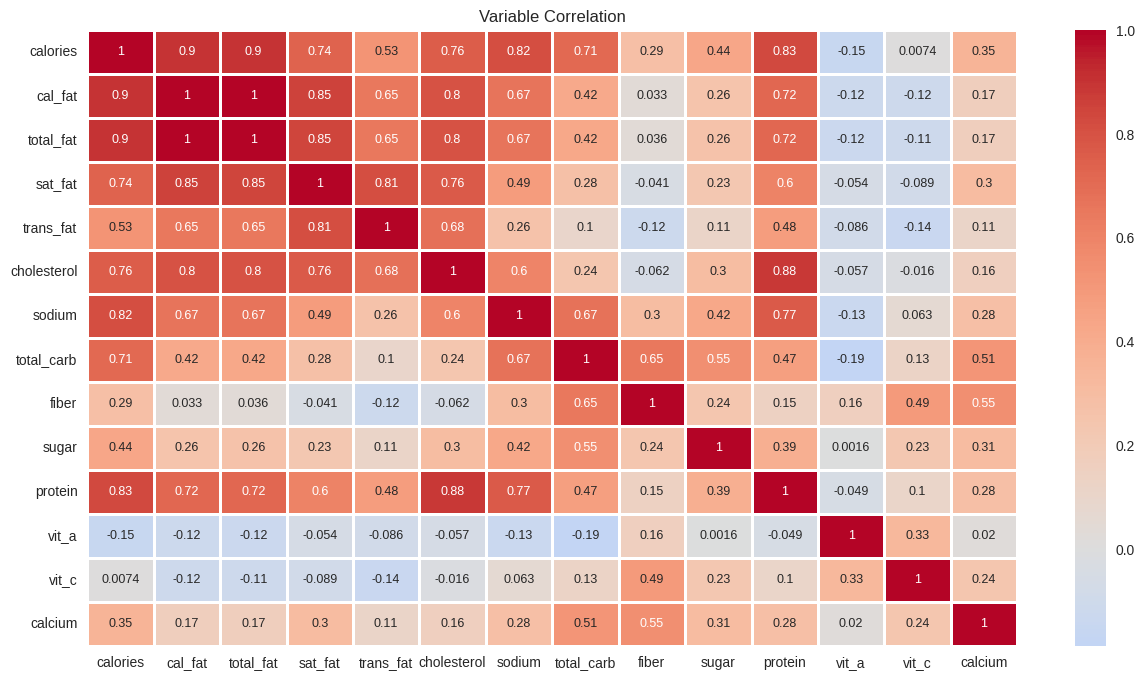

In [14]:
#Representing Matrix as a plot
from IPython.core.pylabtools import figsize
f,ax=plt.subplots(figsize=(15,8))

sns.heatmap(dff.corr(),center=0, linewidths=0.8,cmap='coolwarm',annot=True, annot_kws={"size": 9})
plt.title('Variable Correlation')

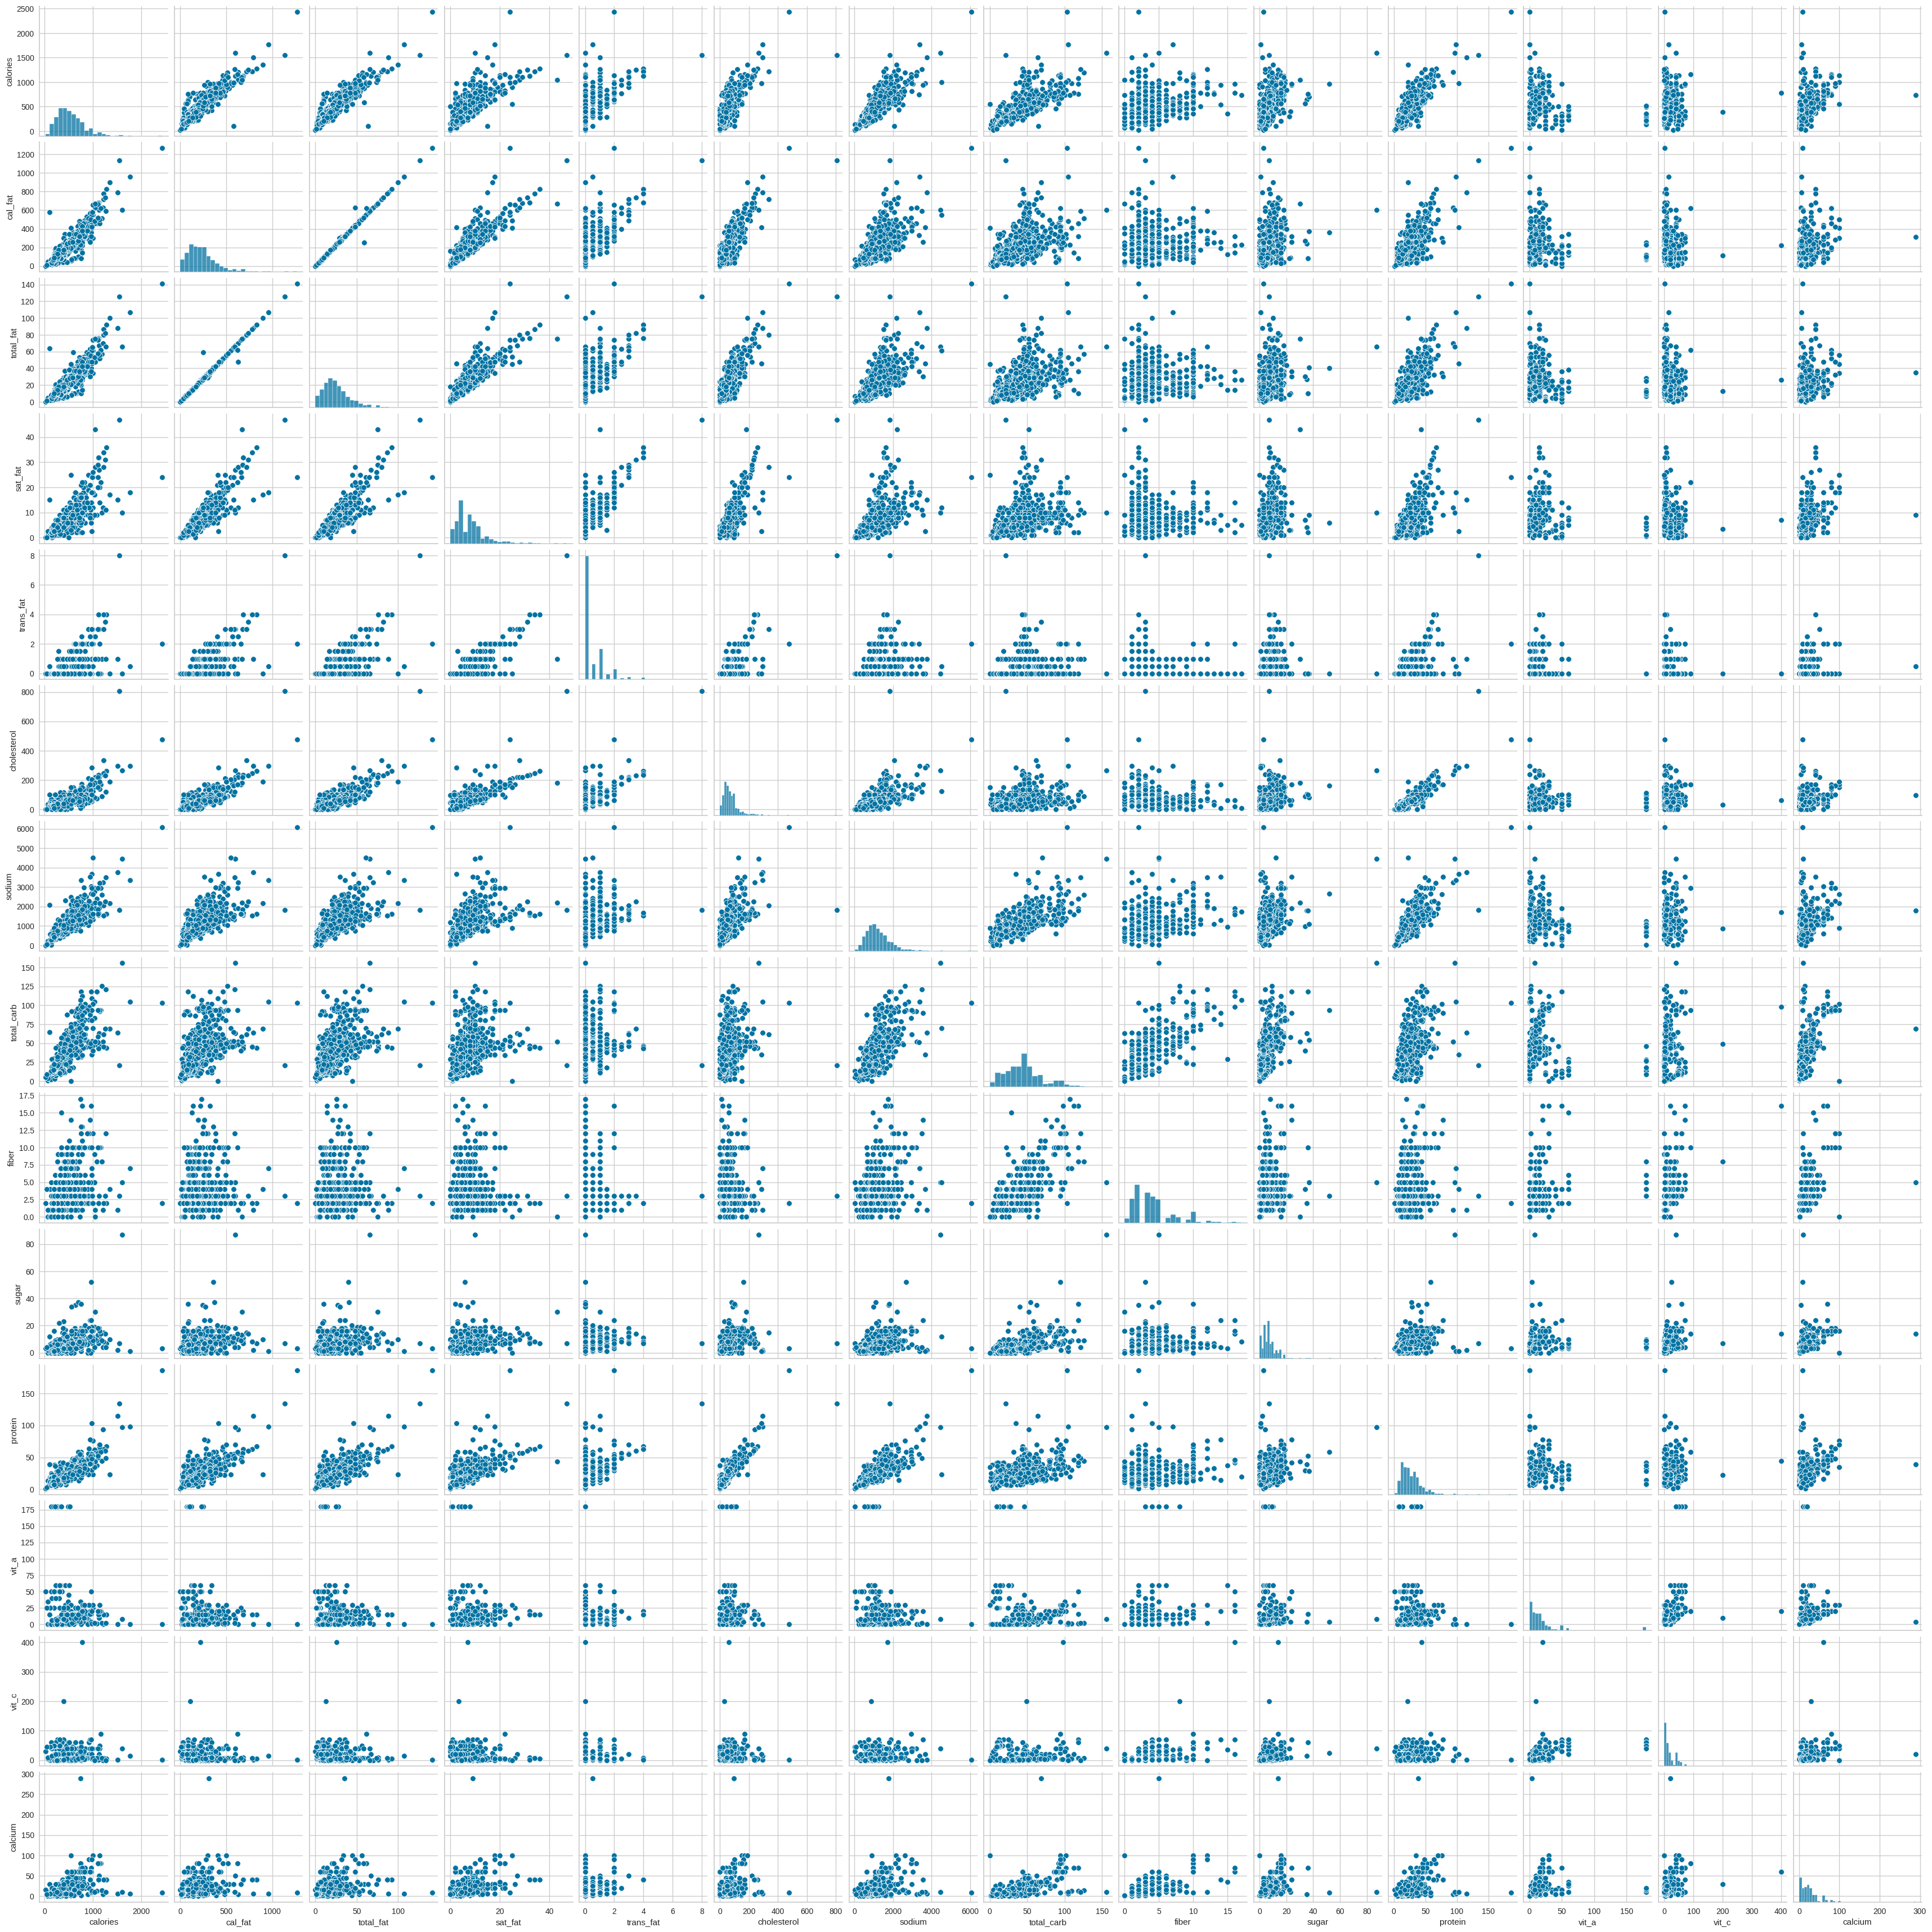

In [15]:
sns.pairplot(
    dff
)  # All attributes are plotted against each other to see the pattern of distribution

In [16]:
df.columns

['restaurant',
 'item',
 'calories',
 'cal_fat',
 'total_fat',
 'sat_fat',
 'trans_fat',
 'cholesterol',
 'sodium',
 'total_carb',
 'fiber',
 'sugar',
 'protein',
 'vit_a',
 'vit_c',
 'calcium',
 'salad']

In [17]:
df.types

{'restaurant': 'enum',
 'item': 'string',
 'calories': 'int',
 'cal_fat': 'int',
 'total_fat': 'int',
 'sat_fat': 'real',
 'trans_fat': 'real',
 'cholesterol': 'int',
 'sodium': 'int',
 'total_carb': 'int',
 'fiber': 'int',
 'sugar': 'int',
 'protein': 'int',
 'vit_a': 'int',
 'vit_c': 'int',
 'calcium': 'int',
 'salad': 'enum'}

In [18]:
df.shape

(515, 17)

In [19]:
# Create a 80/20 train/test split
pct_rows=0.80
df_train, df_test = df.split_frame([pct_rows])

In [20]:
print(df_train.shape)
print(df_test.shape)

(413, 17)
(102, 17)


In [21]:
#Display all columns in X
X=df.columns
print(X)

['restaurant', 'item', 'calories', 'cal_fat', 'total_fat', 'sat_fat', 'trans_fat', 'cholesterol', 'sodium', 'total_carb', 'fiber', 'sugar', 'protein', 'vit_a', 'vit_c', 'calcium', 'salad']


In [22]:
#Seperate Dependent variable from Independent variable
y_numeric ='calories'
X.remove(y_numeric)
print(X)

['restaurant', 'item', 'cal_fat', 'total_fat', 'sat_fat', 'trans_fat', 'cholesterol', 'sodium', 'total_carb', 'fiber', 'sugar', 'protein', 'vit_a', 'vit_c', 'calcium', 'salad']


In [23]:
dfpd=pd.read_csv("https://raw.githubusercontent.com/SaiPranaviJeedigunta/DEMG_assignments/main/DSEM_0022415588/fastfood.csv")

# H2O AutoML Execution

In [24]:
# Set up AutoML
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)

In [25]:
#pass the data through H20AutoML
aml.train(x=X,y=y_numeric,training_frame=df_train)

AutoML progress: |
03:37:18.132: _train param, Dropping bad and constant columns: [item, salad]

██
03:37:24.228: _train param, Dropping bad and constant columns: [item, salad]
03:37:25.286: _train param, Dropping bad and constant columns: [item, salad]

██
03:37:28.980: _train param, Dropping unused columns: [item, salad]
03:37:29.247: _train param, Dropping bad and constant columns: [item, salad]

█
03:37:33.950: _train param, Dropping bad and constant columns: [item, salad]

█
03:37:38.680: _train param, Dropping bad and constant columns: [item, salad]

██
03:37:43.168: _train param, Dropping bad and constant columns: [item, salad]

█
03:37:46.95: _train param, Dropping bad and constant columns: [item, salad]


03:37:48.827: _train param, Dropping unused columns: [item, salad]
03:37:48.989: _train param, Dropping unused columns: [item, salad]
03:37:49.215: _train param, Dropping bad and constant columns: [item, salad]

██
03:37:52.755: _train param, Dropping bad and constant columns

Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_BestOfFamily_2_AutoML_1_20240220_33717


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  ----------------
Stacking strategy                     cross_validation
Number of base models (used / total)  4/4
# GBM base models (used / total)      1/1
# XGBoost base models (used / total)  1/1
# GLM base models (used / total)      1/1
# DRF base models (used / total)      1/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    Random
Metalearner nfolds                    5
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 1682.4861914035969
RMSE: 41.01812028120739
MAE: 11.319738524713607
RMSLE: 0.10835298859254697
Mean Residual Deviance: 1682.4861914035969
R^2: 0.9787744181343131
Null degrees of freedom: 412
Residual degrees of freedom: 408
Null deviance: 32737231.96125909
Residual deviance: 694866.7970496855
AIC: 4251.8187322511685

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 2842.396419014157
RMSE: 53.314129637593794
MAE: 17.026056144859307
RMSLE: 0.12230873915563137
Mean Residual Deviance: 2842.396419014157
R^2: 0.9641414484143913
Null degrees of freedom: 412
Residual degrees of freedom: 408
Null deviance: 32991924.703732096
Residual deviance: 1173909.7210528469
AIC: 4468.385578574312

Cross-Validation Metrics Summary: 
                        mean         sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -----------  -----------  ------------  ------------  ------------  ------------  ------------
mae                     17.0383      4.18361      12.8781       17.474        23.102        13.3183       18.4189
mean_residual_deviance  2993.6       4618.22      319.512       2017.72       11161.3       352.57        1116.85
mse                     2993.6       4618.22      319.512       2017.72       11161.3       352.57        1116.85
null_deviance           6.59838e+06  1.68732e+06  6.4562e+06    9.50134e+06   5.23819e+06   5.66376e+06   6.13242e+06
r2                      0.958811     0.0673824    0.995523      0.980112      0.838884      0.995288      0.984248
residual_deviance       234476       343133       27158.5       185630        837099        26442.8       96049.5
rmse                    44.1275      36.1656      17.8749       44.9191       105.647       18.7769       33.4194
rmsle                   0.0916682    0.0987503    0.0550287     0.0407823     0.267181      0.0335482     0.0618009

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

**Interpreting the above results**

The model trained is a Generalized Linear Model (GLM).

The model key is GLM_1_AutoML_1_20240218_204428.

The model uses Ridge regularization with a lambda value of 0.02686.

The model is trained on the specified training frame.

**Model Metrics**:

Reported on the training data (train data):

Mean Squared Error (MSE): 2371.79

Root Mean Squared Error (RMSE): 48.70

Mean Absolute Error (MAE): 15.15

Root Mean Squared Logarithmic Error (RMSLE): 0.1206

R-squared (R^2): 0.9728

Reported on cross-validation data (cross-validation data):

MSE: 2906.82

RMSE: 53.91

MAE: 17.98

RMSLE: 0.1256

R^2: 0.9666

Additional metrics such as Null Deviance, Residual Deviance, AIC, etc., are also reported.

**Variable Importances**:

Shows the relative importance of each variable in the model.

Variables like total_carb, cal_fat, total_fat, etc., are ranked based on their importance in predicting the target variable.

**Scoring History**:

Shows the scoring history of the model during training.

Includes metrics like Deviance, RMSE, MAE, R^2, etc., for each iteration.

In [26]:
print(aml.leaderboard)

model_id                                                   rmse      mse      mae     rmsle    mean_residual_deviance
StackedEnsemble_BestOfFamily_2_AutoML_1_20240220_33717  53.3141  2842.4   17.0261  0.122309                   2842.4
GLM_1_AutoML_1_20240220_33717                           54.026   2918.81  16.7498  0.121522                   2918.81
StackedEnsemble_BestOfFamily_3_AutoML_1_20240220_33717  57.4087  3295.76  17.2075  0.121982                   3295.76
StackedEnsemble_BestOfFamily_1_AutoML_1_20240220_33717  57.5671  3313.97  17.5049  0.122921                   3313.97
StackedEnsemble_BestOfFamily_4_AutoML_1_20240220_33717  57.6242  3320.54  18.4653  0.122587                   3320.54
StackedEnsemble_AllModels_1_AutoML_1_20240220_33717     58.1207  3378.02  18.2997  0.122858                   3378.02
StackedEnsemble_AllModels_2_AutoML_1_20240220_33717     59.6331  3556.11  18.2639  0.122647                   3556.11
GBM_grid_1_AutoML_1_20240220_33717_model_7              6

# Analysing relation between all variables

I have plotted all independent variables against the 'calories' variable and observed that a roughly linear relationship is obtained, it suggests that there may be a linear relationship between the 'calories' variable and each of the independent variables individually.

A linear relationship implies that as the independent variable increases (or decreases), the 'calories' variable also increases (or decreases) in a roughly linear fashion. This can be visually represented as a straight line when the data points are plotted on a scatter plot.

It's important to note that while individual independent variables may show a linear relationship with the 'calories' variable, the overall relationship in a multivariate setting (where multiple independent variables are considered together) may not be strictly linear. In multivariate analysis, other factors such as interactions between variables and nonlinear effects may also play a role in determining the 'calories' variable.

VIF stands for Variance Inflation Factor.It signifies multicollinearity among set of different independent variable. A value greater than 10 means that the independent variable is highly correlated with some other variable. Will calculate VIF value for all variables to check the dependency and then will drop the variables with high VIF value.

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Selecting variables for VIF calculation
Multic = dfpd[['cal_fat', 'total_fat', 'sat_fat', 'trans_fat', 'cholesterol', 'sodium', 'total_carb', 'fiber', 'sugar', 'protein', 'vit_a', 'vit_c', 'calcium']]

# Replace infinite values with NaNs
Multic.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with missing values
Multic.dropna(inplace=True)

# Compute VIF
vif = pd.DataFrame()
vif["variables"] = Multic.columns
vif["VIF"] = [variance_inflation_factor(Multic.values, i) for i in range(Multic.shape[1])]

# Check for infinite VIF values
if np.any(np.isinf(vif["VIF"])):
    print("Warning: One or more variables have infinite VIF.")

# Drop variables with high VIF
threshold_vif = 10
high_vif_variables = vif[vif["VIF"] > threshold_vif]["variables"]
Multic_dropped = Multic.drop(columns=high_vif_variables)

# Print the variables with high VIF
print("Variables with high VIF:", high_vif_variables)

# Print the remaining variables after dropping those with high VIF
print("Remaining variables after dropping high VIF variables:", Multic_dropped.columns)

Variables with high VIF: 0        cal_fat
1      total_fat
2        sat_fat
4    cholesterol
5         sodium
6     total_carb
7          fiber
9        protein
Name: variables, dtype: object
Remaining variables after dropping high VIF variables: Index(['trans_fat', 'sugar', 'vit_a', 'vit_c', 'calcium'], dtype='object')


In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

Multic = dfpd[['cal_fat', 'total_fat', 'sat_fat', 'trans_fat', 'sodium', 'total_carb', 'fiber', 'sugar','cholesterol','protein', 'vit_a', 'vit_c', 'calcium']]

# Replace infinite values with NaNs
Multic.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with missing values
Multic.dropna(inplace=True)


# Compute VIF
vif = pd.DataFrame()
vif["variables"] = Multic.columns
vif["VIF"] = [variance_inflation_factor(Multic.values, i) for i in range(Multic.shape[1])]
vif

variables          VIF
0       cal_fat  2273.864243
1     total_fat  2279.399928
2       sat_fat    24.795866
3     trans_fat     5.146655
4        sodium    20.427772
5    total_carb    26.329045
6         fiber    11.032909
7         sugar     4.761812
8   cholesterol    71.314226
9       protein    75.243221
10        vit_a     1.714772
11        vit_c     2.414668
12      calcium     4.051848

In [29]:
import statsmodels.formula.api as smf

# Define the formula for OLS regression with significant variables
formula = 'calories ~ total_fat + cal_fat + sat_fat + trans_fat + sodium + total_carb + fiber + sugar + protein + vit_a + vit_c + calcium'

# Fit the OLS model
results = smf.ols(formula=formula, data=dfpd).fit()

# Print the summary of the regression results
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:               calories   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     750.3
Date:                Tue, 20 Feb 2024   Prob (F-statistic):          2.74e-209
Time:                        03:41:03   Log-Likelihood:                -1618.8
No. Observations:                 301   AIC:                             3264.
Df Residuals:                     288   BIC:                             3312.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5689      7.716      0.333      0.7

Dropping variables

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select the remaining independent variables
Multic = dfpd[['cal_fat', 'trans_fat', 'sodium', 'total_carb', 'fiber', 'sugar', 'protein', 'vit_a', 'vit_c', 'calcium']]

# Replace infinite values with NaNs
Multic.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with missing values
Multic.dropna(inplace=True)

# Compute VIF
vif = pd.DataFrame()
vif["variables"] = Multic.columns
vif["VIF"] = [variance_inflation_factor(Multic.values, i) for i in range(Multic.shape[1])]
vif


variables        VIF
0     cal_fat  12.720544
1   trans_fat   2.720738
2      sodium  19.415966
3  total_carb  21.152856
4       fiber  10.794819
5       sugar   4.012308
6     protein  13.814215
7       vit_a   1.642425
8       vit_c   2.400748
9     calcium   3.109548

In [31]:
# Define the new formula for OLS regression
formula = 'calories ~  cal_fat + trans_fat + sodium + total_carb + fiber + sugar + protein + vit_a + vit_c + calcium'

# Fit the new OLS model
results = smf.ols(formula=formula, data=dfpd).fit()

# Print the summary of the new regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               calories   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     899.1
Date:                Tue, 20 Feb 2024   Prob (F-statistic):          9.68e-212
Time:                        03:41:03   Log-Likelihood:                -1620.1
No. Observations:                 301   AIC:                             3262.
Df Residuals:                     290   BIC:                             3303.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7720      7.381      0.647      0.5

**Comparing the regression results before and after dropping 'sat_fat', 'total_fat', and 'cholesterol':**

Before dropping 'sat_fat', 'total_fat', and 'cholesterol':

R-squared: 0.969
Adj. R-squared: 0.968
F-statistic: 815.2
AIC: 3264
BIC: 3308
After dropping 'sat_fat', 'total_fat', and 'cholesterol':

R-squared: 0.969
Adj. R-squared: 0.968
F-statistic: 899.1
AIC: 3262
BIC: 3303
Interpretation:

The R-squared and Adj. R-squared values remain the same before and after dropping 'sat_fat', 'total_fat', and 'cholesterol', indicating that the overall fit of the model remains consistent.
The F-statistic increases from 815.2 to 899.1 after dropping the variables, indicating that the overall significance of the model has improved.
The AIC decreases slightly from 3264 to 3262, and the BIC decreases more noticeably from 3308 to 3303 after dropping the variables. This suggests that the new model with fewer variables is a better fit and is more parsimonious.
Overall, dropping 'sat_fat', 'total_fat', and 'cholesterol' seems to have improved the model's performance slightly, as indicated by the increase in the F-statistic and the decrease in the AIC and BIC.

# Correlation Analysis

Now, The correlation matrix is simply a table of correlations.Each random variable in the table is correlated with each of the other values in the table. This allows us to see which pairs have the highest correlation.It also tells us if it is directly dependent or inversely by signifying the positive and negative signs.



In [32]:
#Dopping the unecessary features as discussed above
dfpd1=dfpd.drop(['sat_fat', 'total_fat', 'cholesterol'], axis=1)

In [33]:
dfpd1

restaurant                                       item  calories  cal_fat  \
0    Mcdonalds           Artisan Grilled Chicken Sandwich       380       60   
1    Mcdonalds             Single Bacon Smokehouse Burger       840      410   
2    Mcdonalds             Double Bacon Smokehouse Burger      1130      600   
3    Mcdonalds  Grilled Bacon Smokehouse Chicken Sandwich       750      280   
4    Mcdonalds   Crispy Bacon Smokehouse Chicken Sandwich       920      410   
..         ...                                        ...       ...      ...   
510  Taco Bell             Spicy Triple Double Crunchwrap       780      340   
511  Taco Bell                Express Taco Salad w/ Chips       580      260   
512  Taco Bell                     Fiesta Taco Salad-Beef       780      380   
513  Taco Bell                  Fiesta Taco Salad-Chicken       720      320   
514  Taco Bell                    Fiesta Taco Salad-Steak       720      320   

     trans_fat  sodium  total_carb  fiber  sugar  protein  vit_a  vit_c  \
0          0.0    1110          44    3.0     11     37.0    4.0   20.0   
1          1.5    1580          62    2.0     18     46.0    6.0   20.0   
2          3.0    1920          63    3.0     18     70.0   10.0   20.0   
3          0.5    1940          62    2.0     18     55.0    6.0   25.0   
4          0.5    1980          81    4.0     18     46.0    6.0   20.0   
..         ...     ...         ...    ...    ...      ...    ...    ...   
510        0.5    1850          87    9.0      8     23.0   20.0   10.0   
511        1.0    1270          59    8.0      7     23.0    NaN    NaN   
512        1.0    1340          74   11.0      7     26.0    NaN    NaN   
513        0.0    1260          70    8.0      8     32.0    NaN    NaN   
514        1.0    1340          70    8.0      8     28.0    NaN    NaN   

     calcium  salad  
0       20.0  Other  
1       20.0  Other  
2       50.0  Other  
3       20.0  Other  
4       20.0  Other  
..       ...    ...  
510     25.0  Other  
511      NaN  Other  
512      NaN  Other  
513      NaN  Other  
514      NaN  Other  

[515 rows x 14 columns]

The correlation matrix is simply a table of correlations.Each random variable in the table is correlated with each of the other values in the table. This allows us to see which pairs have the highest correlation.It also tells us if it is directly dependent or inversely by signifying the positive and negative signs.



In [34]:
#Calculating correlation matrix for all variables
dfpd1.corr()

calories   cal_fat  trans_fat    sodium  total_carb     fiber  \
calories    1.000000  0.901661   0.530354  0.817855    0.712701  0.287031   
cal_fat     0.901661  1.000000   0.648422  0.670458    0.419373  0.032643   
trans_fat   0.530354  0.648422   1.000000  0.261466    0.100284 -0.121890   
sodium      0.817855  0.670458   0.261466  1.000000    0.671976  0.301023   
total_carb  0.712701  0.419373   0.100284  0.671976    1.000000  0.648839   
fiber       0.287031  0.032643  -0.121890  0.301023    0.648839  1.000000   
sugar       0.437711  0.255485   0.112651  0.422993    0.547026  0.236475   
protein     0.831957  0.720379   0.478960  0.766942    0.474396  0.148053   
vit_a      -0.153963 -0.121748  -0.086352 -0.134031   -0.187004  0.157631   
vit_c       0.007387 -0.115456  -0.141754  0.062994    0.128177  0.491224   
calcium     0.351207  0.166801   0.114094  0.284882    0.514463  0.546734   

               sugar   protein     vit_a     vit_c   calcium  
calories    0.437711  0.831957 -0.153963  0.007387  0.351207  
cal_fat     0.255485  0.720379 -0.121748 -0.115456  0.166801  
trans_fat   0.112651  0.478960 -0.086352 -0.141754  0.114094  
sodium      0.422993  0.766942 -0.134031  0.062994  0.284882  
total_carb  0.547026  0.474396 -0.187004  0.128177  0.514463  
fiber       0.236475  0.148053  0.157631  0.491224  0.546734  
sugar       1.000000  0.389959  0.001626  0.229223  0.310559  
protein     0.389959  1.000000 -0.049423  0.100523  0.284497  
vit_a       0.001626 -0.049423  1.000000  0.332259  0.019624  
vit_c       0.229223  0.100523  0.332259  1.000000  0.236129  
calcium     0.310559  0.284497  0.019624  0.236129  1.000000

The correlation matrix above shows the correlation coefficients between the variables in the dataset. Here are some observations:

Calories have a strong positive correlation with cal_fat (0.9017), sodium (0.8179), total_carb (0.7127), and protein (0.8320). These variables might be important predictors of calorie content.

Fiber has moderate positive correlations with total_carb (0.6488) and protein (0.1481).

Vit_C has a moderate positive correlation with fiber (0.4912) and a weak positive correlation with sugar (0.2292).

Calcium has moderate positive correlations with fiber (0.5467) and total_carb (0.5145).


Text(0.5, 1.0, 'Variable Correlation')

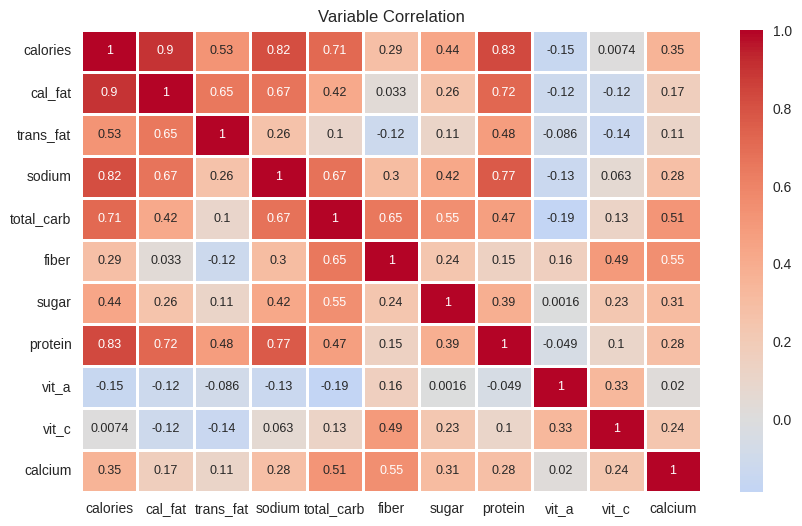

In [35]:
#Representing Matrix as a plot
from IPython.core.pylabtools import figsize
f,ax=plt.subplots(figsize=(10,6))

sns.heatmap(dfpd1.corr(),center=0, linewidths=0.8,cmap='coolwarm',annot=True, annot_kws={"size": 9})
plt.title('Variable Correlation')

Plotting all variables against other variables to see if relation exists between them. Basically it tells the same thing as correlation matrix but in a graphical way.

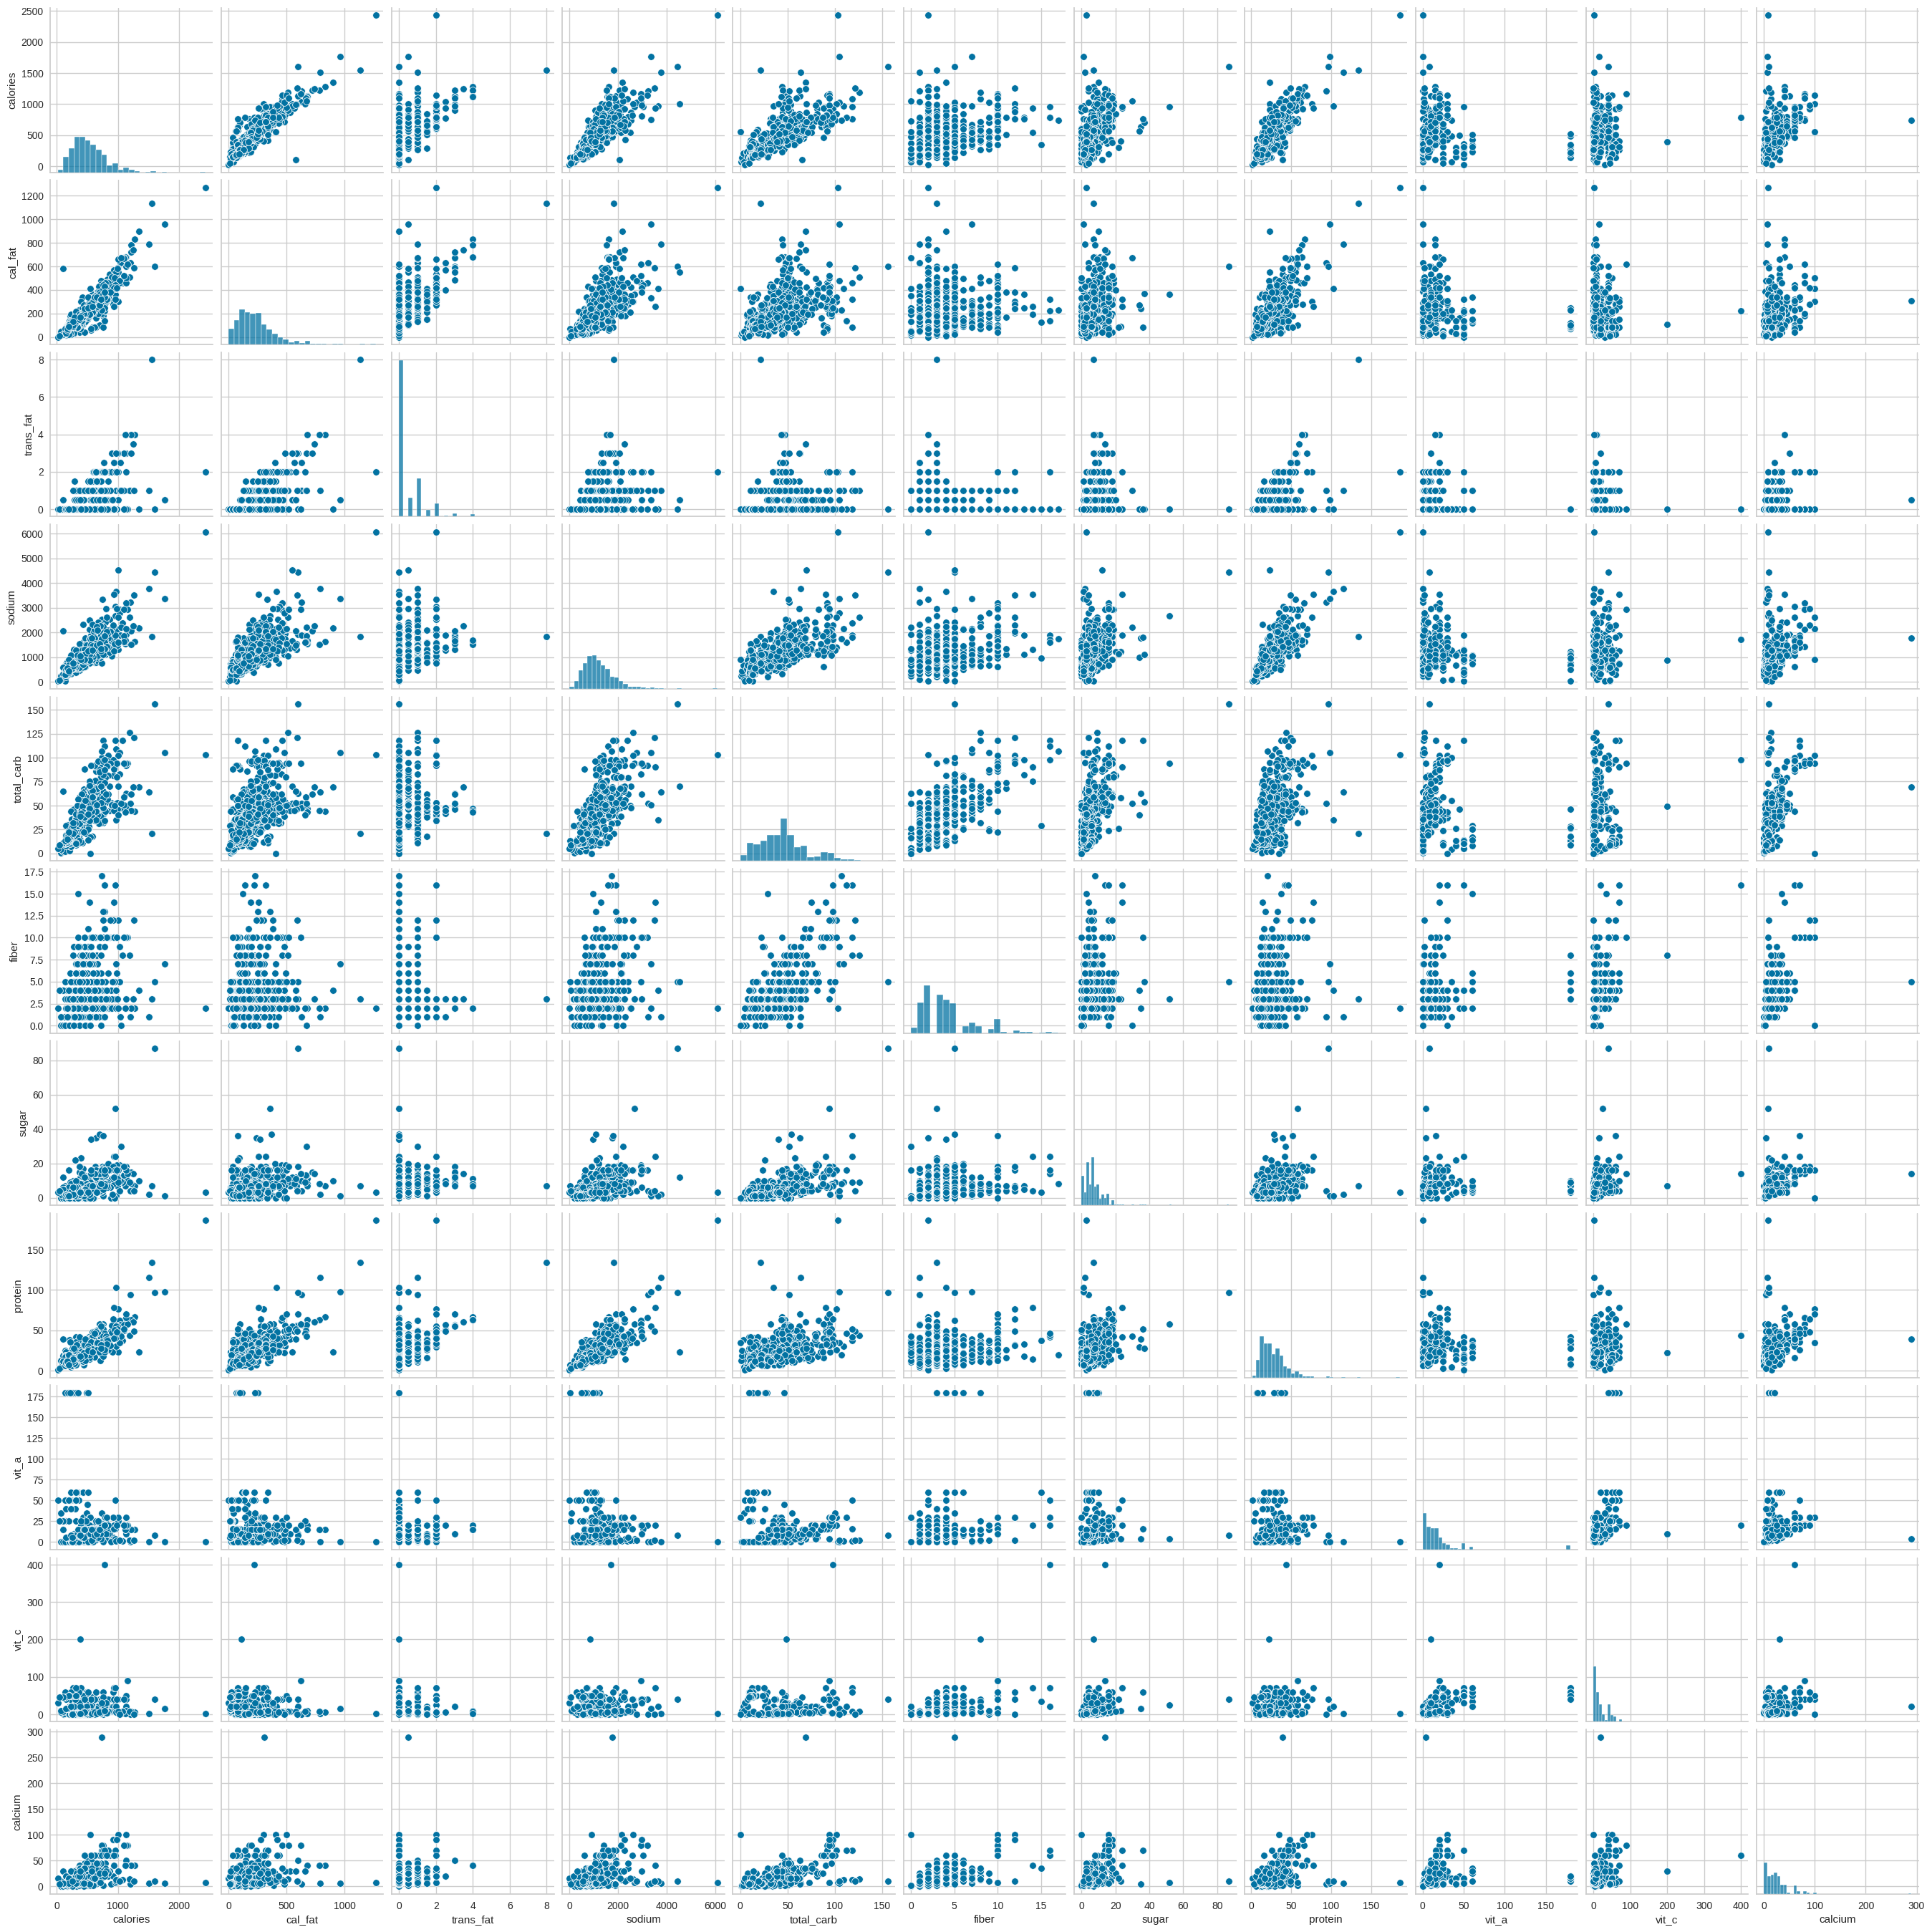

In [36]:
sns.pairplot(dfpd1)

# H20 AutoML Rexecution on new model

Here, we are repeating the entire process exactly as above whilst ignoring the unecessary features. Dropping the variables that are not significant for determining calories. Dropping total_fat and cholesterol

In [37]:
df1 = dfpd1

In [38]:
import h2o

# Convert pandas DataFrame df1 to H2OFrame
df1 = h2o.H2OFrame(df1)

# Now you can use the split_frame method
df1_train, df1_test = df1.split_frame([pct_rows])

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [39]:
X1=df1.columns
print(X1)

['restaurant', 'item', 'calories', 'cal_fat', 'trans_fat', 'sodium', 'total_carb', 'fiber', 'sugar', 'protein', 'vit_a', 'vit_c', 'calcium', 'salad']


In [40]:
#Seperate Dependent variable from Independent variable
y1_numeric ='calories'
X1.remove(y1_numeric)
print(X1)

['restaurant', 'item', 'cal_fat', 'trans_fat', 'sodium', 'total_carb', 'fiber', 'sugar', 'protein', 'vit_a', 'vit_c', 'calcium', 'salad']


In [41]:
aml1 = H2OAutoML(max_runtime_secs=run_time, seed=1)

In [42]:
aml1.train(x=X1,y=y1_numeric,training_frame=df1_train)

AutoML progress: |
03:42:06.367: _train param, Dropping bad and constant columns: [item, salad]

█
03:42:09.790: _train param, Dropping bad and constant columns: [item, salad]


03:42:10.186: _train param, Dropping bad and constant columns: [item, salad]

█
03:42:10.970: _train param, Dropping unused columns: [item, salad]
03:42:11.195: _train param, Dropping bad and constant columns: [item, salad]

██
03:42:14.71: _train param, Dropping bad and constant columns: [item, salad]

█
03:42:16.173: _train param, Dropping bad and constant columns: [item, salad]

█
03:42:18.481: _train param, Dropping bad and constant columns: [item, salad]

█
03:42:20.326: _train param, Dropping bad and constant columns: [item, salad]

██
03:42:22.339: _train param, Dropping unused columns: [item, salad]
03:42:22.472: _train param, Dropping unused columns: [item, salad]
03:42:22.708: _train param, Dropping bad and constant columns: [item, salad]

██
03:42:25.76: _train param, Dropping bad and constant column

Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_BestOfFamily_1_AutoML_2_20240220_34206


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  ----------------
Stacking strategy                     cross_validation
Number of base models (used / total)  2/3
# GBM base models (used / total)      0/1
# XGBoost base models (used / total)  1/1
# GLM base models (used / total)      1/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    Random
Metalearner nfolds                    5
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 320.55029719106693
RMSE: 17.903918487053804
MAE: 10.416981661937822
RMSLE: 0.03454571947660668
Mean Residual Deviance: 320.55029719106693
R^2: 0.9960732794319697
Null degrees of freedom: 417
Residual degrees of freedom: 415
Null deviance: 34122627.75119617
Residual deviance: 133990.024225866
AIC: 3606.1089983397796

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 412.07556910512307
RMSE: 20.299644556127653
MAE: 11.966674996296039
RMSLE: 0.03813139645089147
Mean Residual Deviance: 412.07556910512307
R^2: 0.9949521007250122
Null degrees of freedom: 417
Residual degrees of freedom: 415
Null deviance: 34374152.182582974
Residual deviance: 172247.58788594144
AIC: 3711.097036382762

Cross-Validation Metrics Summary: 
                        mean         sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -----------  -----------  ------------  ------------  ------------  ------------  ------------
mae                     12.1013      2.22663      10.3741       9.58347       13.6808       14.9276       11.9404
mean_residual_deviance  432.445      316.1        208.008       174.995       900.064       618.818       260.338
mse                     432.445      316.1        208.008       174.995       900.064       618.818       260.338
null_deviance           6.87483e+06  1.94245e+06  5.62288e+06   1.02063e+07   6.53679e+06   5.37338e+06   6.6348e+06
r2                      0.994491     0.00380907   0.996726      0.998339      0.989532      0.991379      0.996481
residual_deviance       34278.6      22428.5      18096.7       16449.5       68404.9       45792.5       22649.4
rmse                    19.7326      7.33722      14.4225       13.2286       30.0011       24.876        16.135
rmsle                   0.0374859    0.0113157    0.032242      0.0244015     0.0540729     0.0426483     0.0340651

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [43]:
print(aml1.leaderboard)

model_id                                                   rmse       mse      mae        rmsle    mean_residual_deviance
StackedEnsemble_BestOfFamily_1_AutoML_2_20240220_34206  20.2996   412.076  11.9667    0.0381314                   412.076
StackedEnsemble_BestOfFamily_2_AutoML_2_20240220_34206  20.4062   416.412  12.0891    0.0392171                   416.412
StackedEnsemble_AllModels_1_AutoML_2_20240220_34206     20.4152   416.78   11.966     0.0383148                   416.78
StackedEnsemble_BestOfFamily_3_AutoML_2_20240220_34206  20.442    417.874  12.0977    0.0393381                   417.874
GLM_1_AutoML_2_20240220_34206                           20.4807   419.458  12.0949    0.0448974                   419.458
StackedEnsemble_AllModels_2_AutoML_2_20240220_34206     20.8036   432.791  12.0756    0.0406088                   432.791
StackedEnsemble_BestOfFamily_4_AutoML_2_20240220_34206  21.5544   464.591  12.4077    0.0389041                   464.591
DeepLearning_grid_1_AutoM

In [44]:
#assign index values to all the models generated
model_index=0
glm_index=0
glm_model=''
aml1_leaderboard_df1=aml1.leaderboard.as_data_frame()
models_dict={}
for m in aml1_leaderboard_df1['model_id']:
  models_dict[m]=model_index
  if 'StackedEnsemble' not in m:
    break
  model_index=model_index+1

for m in aml1_leaderboard_df1['model_id']:
  if 'GLM' in m:
    models_dict[m]=glm_index
    break
  glm_index=glm_index+1
models_dict

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


{'StackedEnsemble_BestOfFamily_1_AutoML_2_20240220_34206': 0,
 'StackedEnsemble_BestOfFamily_2_AutoML_2_20240220_34206': 1,
 'StackedEnsemble_AllModels_1_AutoML_2_20240220_34206': 2,
 'StackedEnsemble_BestOfFamily_3_AutoML_2_20240220_34206': 3,
 'GLM_1_AutoML_2_20240220_34206': 4}

In [45]:
#print the index value of best model
print(model_index)
best_model1 = h2o.get_model(aml1.leaderboard[model_index,'model_id'])

4


In [46]:
best_model1.algo

'glm'

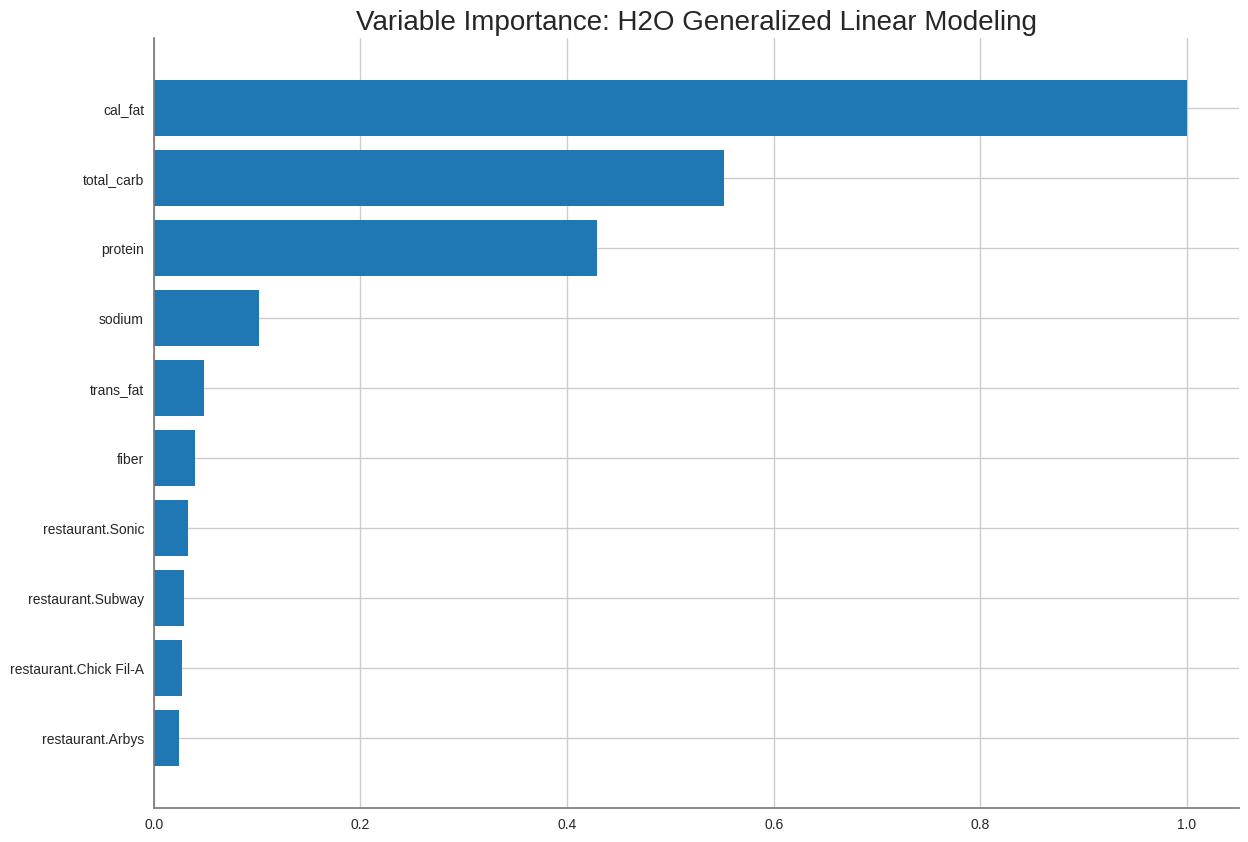

<Figure size 800x550 with 0 Axes>

In [47]:
# Plot variable importances
if best_model1.algo in ['glm','drf','xrt','xgboost']:
    best_model1.varimp_plot()

In [48]:
if glm_index is 0:
  print(glm_index)
  glm_model1=h2o.get_model(aml1.leaderboard[glm_index,'model_id'])
  print(glm_model1.algo)
  glm_model1.std_coef_plot()

# Checking if assumptions violated

Checking if the model has violated any assumptions. For linear regression some of the assumptions are:

(1)There needs to be linear relation between the independent and dependent variable.

(2)Homoscedasticity which means normality of the error distribution.The plot for residuals against target variable should be normally distributed.

(3)Thirdly, linear regression assumes that there is little or no multicollinearity in the data. Multicollinearity occurs when the independent variables are too highly correlated with each other.

(4)There should be no or little auto correlation. One way to test this is by Durbin-Watson test. The values should be brtween 1.5-2.5 for no autocorrelation.



In [49]:
#Seperating the predictor and target variables
A=dfpd1.drop(['calories'],axis=1)
B=dfpd1['calories']

In [50]:
#Splitting the data
A_train,A_test,b_train,b_test=tts(A,B,test_size=0.2,random_state=42)

Here we are check if the Homoscedasticity (normality of the error distribution) assumption is satisfies. A normal distribution of errors is expected.


In [51]:
df1_train

restaurant    item                                             calories    cal_fat    trans_fat    sodium    total_carb    fiber    sugar    protein    vit_a    vit_c    calcium  salad
------------  ---------------------------------------------  ----------  ---------  -----------  --------  ------------  -------  -------  ---------  -------  -------  ---------  -------
Mcdonalds     Artisan Grilled Chicken Sandwich                      380         60          0        1110            44        3       11         37        4       20         20  Other
Mcdonalds     Single Bacon Smokehouse Burger                        840        410          1.5      1580            62        2       18         46        6       20         20  Other
Mcdonalds     Crispy Bacon Smokehouse Chicken Sandwich              920        410          0.5      1980            81        4       18         46        6       20         20  Other
Mcdonalds     Big Mac                                               540        250          1         950            46        3        9         25       10        2         15  Other
Mcdonalds     Cheeseburger                                          300        100          0.5       680            33        2        7         15       10        2         10  Other
Mcdonalds     Classic Chicken Sandwich                              510        210          0        1040            49        3        6         25        0        4          2  Other
Mcdonalds     Double Cheeseburger                                   430        190          1        1040            35        2        7         25       20        4         15  Other
Mcdonalds     Filet-O-Fish®                                         380        170          0         640            38        2        5         15        2        0         15  Other
Mcdonalds     Garlic White Cheddar Burger                           620        300          1.5       790            48        3       11         32       10       10         35  Other
Mcdonalds     Grilled Garlic White Cheddar Chicken Sandwich         530        180          0        1150            48        3       11         42       10       20         35  Other
[418 rows x 14 columns]

In [52]:
df1_train.columns

['restaurant',
 'item',
 'calories',
 'cal_fat',
 'trans_fat',
 'sodium',
 'total_carb',
 'fiber',
 'sugar',
 'protein',
 'vit_a',
 'vit_c',
 'calcium',
 'salad']

In [67]:
import statsmodels.api as sm

# Define the independent variables
cols1 = ['cal_fat', 'trans_fat', 'sodium', 'total_carb', 'fiber', 'sugar', 'protein', 'vit_a', 'vit_c', 'calcium']

# Fit the OLS model
model1 = sm.OLS(b_train, sm.add_constant(A_train[cols1])).fit()

# Print the summary of the model
print(model1.summary())


                            OLS Regression Results                            
Dep. Variable:               calories   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     1302.
Date:                Tue, 20 Feb 2024   Prob (F-statistic):          1.30e-298
Time:                        03:47:06   Log-Likelihood:                -2178.0
No. Observations:                 412   AIC:                             4378.
Df Residuals:                     401   BIC:                             4422.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8514      6.271      1.093      0.2

In [58]:
print(A_train[cols1].isnull().sum())
print(np.isinf(A_train[cols1]).sum())

cal_fat         0
trans_fat       0
sodium          0
total_carb      0
fiber          10
sugar           0
protein         1
vit_a         169
vit_c         168
calcium       168
dtype: int64
cal_fat       0
trans_fat     0
sodium        0
total_carb    0
fiber         0
sugar         0
protein       0
vit_a         0
vit_c         0
calcium       0
dtype: int64


In [59]:
A_train[cols1] = A_train[cols1].fillna(A_train[cols1].mean())

In [68]:
b_pred = model1.predict(sm.add_constant(A_train[cols1]))

In [75]:
residuals = b_train-b_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 1.509385928003009e-12


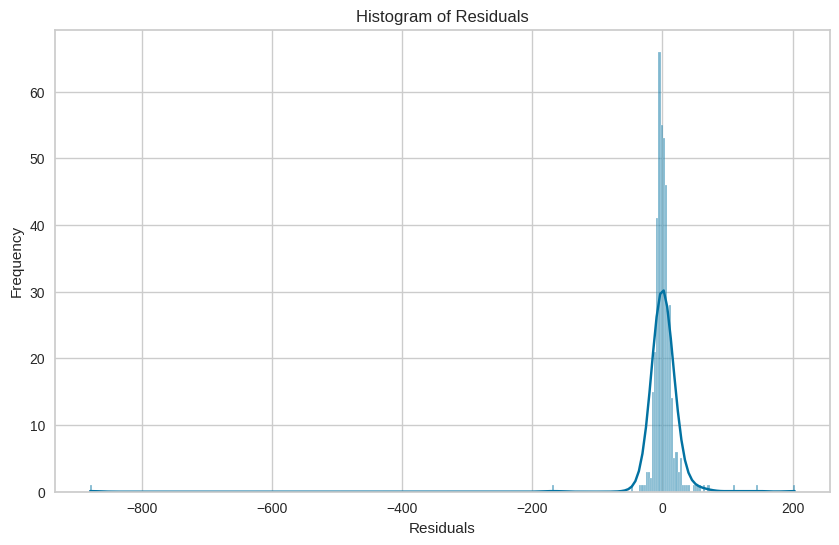

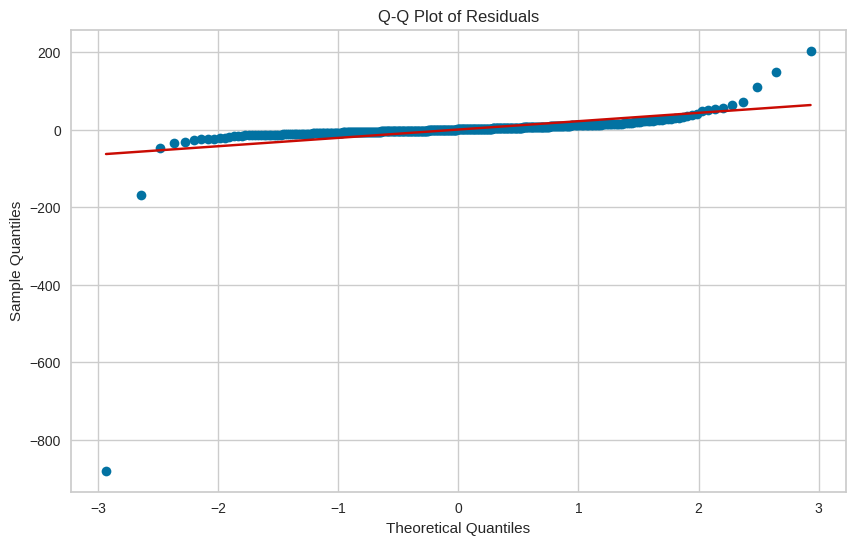

In [76]:
# Plot histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Q-Q plot of residuals
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()


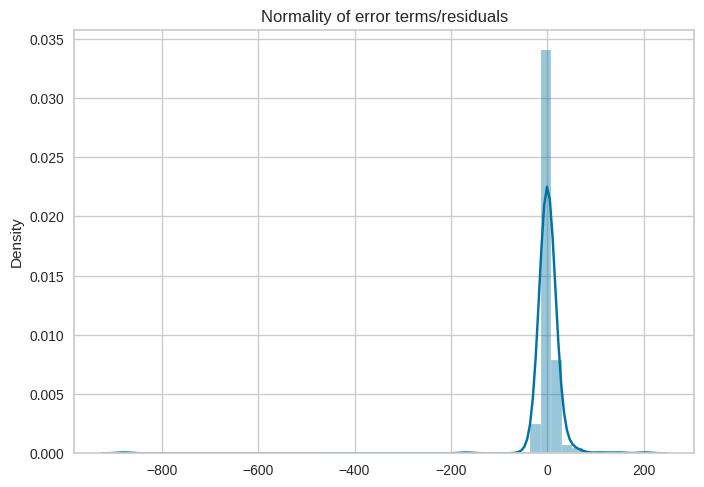

In [77]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

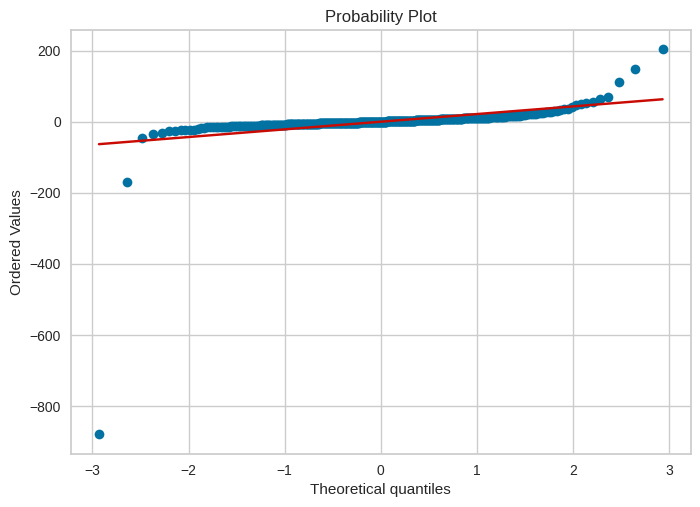

In [79]:
import pylab
import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()

<Axes: xlabel='calories', ylabel='Count'>

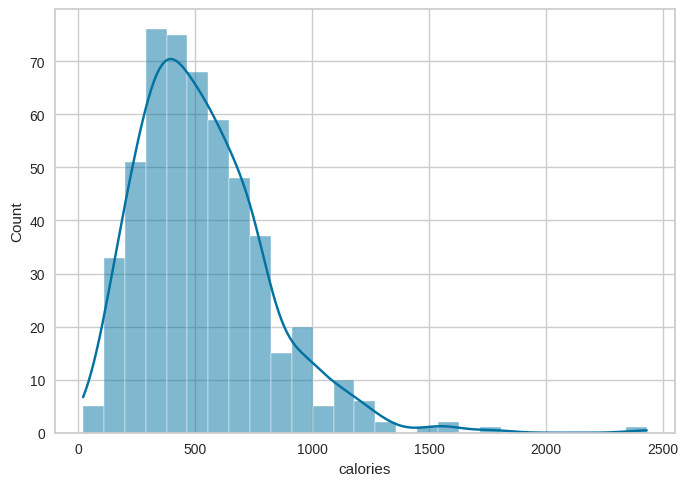

In [80]:
sns.histplot(dfpd.calories, kde = True)

# Ridge Regularization in H20

The main purpose of regression is to find patterns in this underlying dataset and generalize it to predict the corresponding target value for some new values of independent values. But sometimes target dataset is inflicted with some random noise. Although there may not be error for training set it will give huge errors in predicting the correct target values for test dataset.To avoid this condition regularization is used. Regularization is a technique used for tuning the random noise function by adding an additional term to noise function. This additional term controls the excessively fluctuating function such that the coefficients don’t take extreme values and the prediction of target value for test data is not highly affected. For this model, Ridge Regularization is used.

Here, we use H2OGeneralizedLinearEstimator which would enable us to fit a generalized linear model, specified by a response variable, a set of predictors and a description of the error distribution.

In [81]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
house_glm = H2OGeneralizedLinearEstimator(family = 'gaussian', lambda_ = 0, compute_p_values = True)
house_glm_regularization = H2OGeneralizedLinearEstimator(family = 'gaussian', lambda_ = .001, alpha = 0)

In [82]:
house_glm_regularization.train(x = X1, y = y1_numeric, training_frame = df1_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1708400122716_50


GLM Model: summary
    family    link      regularization            number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Ridge ( lambda = 0.001 )  18                            18                             1                       py_8_sid_9de6

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 268.2107002848992
RMSE: 16.377139563577614
MAE: 8.359663729469746
RMSLE: 0.03548806257188769
Mean Residual Deviance: 268.2107002848992
R^2: 0.9967144361349732
Null degrees of freedom: 417
Residual degrees of freedom: 399
Null deviance: 34122627.75119617
Residual deviance: 112112.07271908787
AIC: 3563.5936720456793

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective          training_rmse       training_deviance    training_mae       training_r2
--  -------------------  ----------  ------------  -------------------------  -----------------  ------------------  -------------------  -----------------  ------------------
    2024-02-20 03:47:42  0.000 sec   0             34122627.75119617          81633.08074448844
    2024-02-20 03:47:42  0.014 sec   1                                                           16.377139563577614  268.2107002848992    8.359663729469746  0.9967144361349732

Variable Importances: 
variable                relative_importance    scaled_importance    percentage
----------------------  ---------------------  -------------------  ------------
cal_fat                 167.846                1                    0.463054
total_carb              92.968                 0.55389              0.256481
protein                 68.3097                0.406979             0.188454
restaurant.Dairy Queen  5.33675                0.0317955            0.0147231
sodium                  4.50376                0.0268327            0.012425
restaurant.Sonic        3.969                  0.0236467            0.0109497
fiber                   3.13078                0.0186528            0.00863724
restaurant.Subway       2.80184                0.016693             0.00772975
vit_a                   2.69517                0.0160574            0.00743546
restaurant.Chick Fil-A  2.28131                0.0135917            0.00629369
restaurant.Arbys        2.12884                0.0126833            0.00587307
trans_fat               2.08917                0.012447             0.00576363
sugar                   1.61498                0.00962179           0.00445541
restaurant.Taco Bell    1.36142                0.00811117           0.00375591
restaurant.Burger King  0.68266                0.00406718           0.00188333
vit_c                   0.524062               0.00312228           0.00144579
calcium                 0.182228               0.00108569           0.000502732
restaurant.Mcdonalds    0.049671               0.000295932          0.000137033

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [83]:
#Model details without regularization
house_glm.train(x = X1, y = y1_numeric, training_frame = df1_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1708400122716_51


GLM Model: summary
    family    link      regularization    number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ----------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  None              17                            17                             1                       py_8_sid_9de6

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 268.076066444602
RMSE: 16.37302862773415
MAE: 8.334139308061644
RMSLE: 0.03542740250620181
Mean Residual Deviance: 268.076066444602
R^2: 0.9967160853908763
Null degrees of freedom: 417
Residual degrees of freedom: 400
Null deviance: 34122627.75119617
Residual deviance: 112055.79577384365
AIC: 3561.3837957260766

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective          training_rmse      training_deviance    training_mae       training_r2
--  -------------------  ----------  ------------  -------------------------  -----------------  -----------------  -------------------  -----------------  ------------------
    2024-02-20 03:47:42  0.000 sec   0             34122627.75119617          81633.08074448844
    2024-02-20 03:47:42  0.035 sec   1                                                           16.37302862773415  268.076066444602     8.334139308061644  0.9967160853908763

Variable Importances: 
variable                relative_importance    scaled_importance    percentage
----------------------  ---------------------  -------------------  ------------
cal_fat                 168.439                1                    0.46559
total_carb              93.3299                0.554087             0.257978
protein                 68.3896                0.40602              0.189039
restaurant.Dairy Queen  7.44222                0.0441835            0.0205714
restaurant.Sonic        5.91343                0.0351072            0.0163456
sodium                  3.94106                0.0233976            0.0108937
fiber                   2.97276                0.0176489            0.00821716
vit_a                   2.72178                0.0161588            0.0075234
restaurant.Mcdonalds    1.85227                0.0109967            0.00511995
trans_fat               1.8306                 0.0108681            0.00506006
sugar                   1.53018                0.00908447           0.00422964
restaurant.Burger King  1.09998                0.00653041           0.0030405
vit_c                   0.719115               0.00426929           0.00198774
restaurant.Subway       0.698265               0.00414551           0.00193011
restaurant.Taco Bell    0.676875               0.00401851           0.00187098
restaurant.Chick Fil-A  0.114018               0.00067691           0.000315163
calcium                 0.103992               0.000617386          0.000287449

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

# Data Report

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                   rmse      mse      mae     rmsle    mean_residual_deviance    training_time_ms    predict_time_per_row_ms  algo
------------------------------------------------------  -------  -------  -------  --------  ------------------------  ------------------  -------------------------  ---------------
XGBoost_grid_1_AutoML_2_20240220_34206_model_12         85.866   7372.98  38.7156  0.222913                   7372.98                 321                   0.01385   XGBoost
GBM_grid_1_AutoML_2_20240220_34206_model_12             87.8713  7721.37  28.7514  0.229358                   7721.37                 206                   0.024134  GBM
GBM_grid_1_AutoML_2_20240220_34206_model_7              89.084   7935.96  35.5032  0.229487                   7935.96                  94                   0.01969   GBM
XGBoost_grid_1_AutoML_2_20240220_34206_model_8          89.6223  8032.15  33.0625  0.232228                   8032.15                 346                   0.030793  XGBoost
StackedEnsemble_AllModels_3_AutoML_2_20240220_34206     91.1595  8310.06  32.5207  0.239633                   8310.06                 570                   0.402667  StackedEnsemble
GBM_grid_1_AutoML_2_20240220_34206_model_32             91.8046  8428.08  30.2822  0.232731                   8428.08                 206                   0.038964  GBM
GBM_grid_1_AutoML_2_20240220_34206_model_47             91.9107  8447.57  29.4763  0.233566                   8447.57                 381                   0.039433  GBM
StackedEnsemble_AllModels_4_AutoML_2_20240220_34206     92.2626  8512.4   33.3064  0.241019                   8512.4                  526                   0.44159   StackedEnsemble
GBM_grid_1_AutoML_2_20240220_34206_model_53             92.4185  8541.17  35.6029  0.234618                   8541.17                 506                   0.03918   GBM
GBM_5_AutoML_2_20240220_34206                           92.8937  8629.24  31.0855  0.234529                   8629.24                 346                   0.027985  GBM
XGBoost_grid_1_AutoML_2_20240220_34206_model_17         92.9447  8638.73  31.8451  0.237158                   8638.73                 329                   0.01804   XGBoost
GBM_grid_1_AutoML_2_20240220_34206_model_33             93.3642  8716.88  38.6384  0.235431                   8716.88                 170                   0.03161   GBM
XGBoost_grid_1_AutoML_2_20240220_34206_model_1          93.4302  8729.2   37.2643  0.23489                    8729.2                  552                   0.015321  XGBoost
GBM_grid_1_AutoML_2_20240220_34206_model_2              93.861   8809.89  33.1463  0.235602                   8809.89                 115                   0.018035  GBM
GLM_1_AutoML_2_20240220_34206                           93.9933  8834.75  22.0085  0.233917                   8834.75                  24                   0.004599  GLM
GBM_grid_1_AutoML_2_20240220_34206_model_41             94.0521  8845.79  41.2871  0.236336                   8845.79                 288                   0.033692  GBM
XGBoost_grid_1_AutoML_2_20240220_34206_model_25         94.2566  8884.31  35.1513  0.237568                   8884.31                 479                   0.006837  XGBoost
GBM_grid_1_AutoML_2_20240220_34206_model_35             94.4766  8925.83  32.4417  0.232296                   8925.83                 184                   0.02828   GBM
GBM_2_AutoML_2_20240220_34206                           94.5945  8948.12  32.3184  0.23117                    8948.12                 429                   0.024224  GBM
StackedEnsemble_BestOfFamily_4_AutoML_2_20240220_34206  94.7738  8982.06  22.55    0.234531                   8982.06                 129                   0.092005  StackedEnsemble
[20 rows x 9 columns]

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

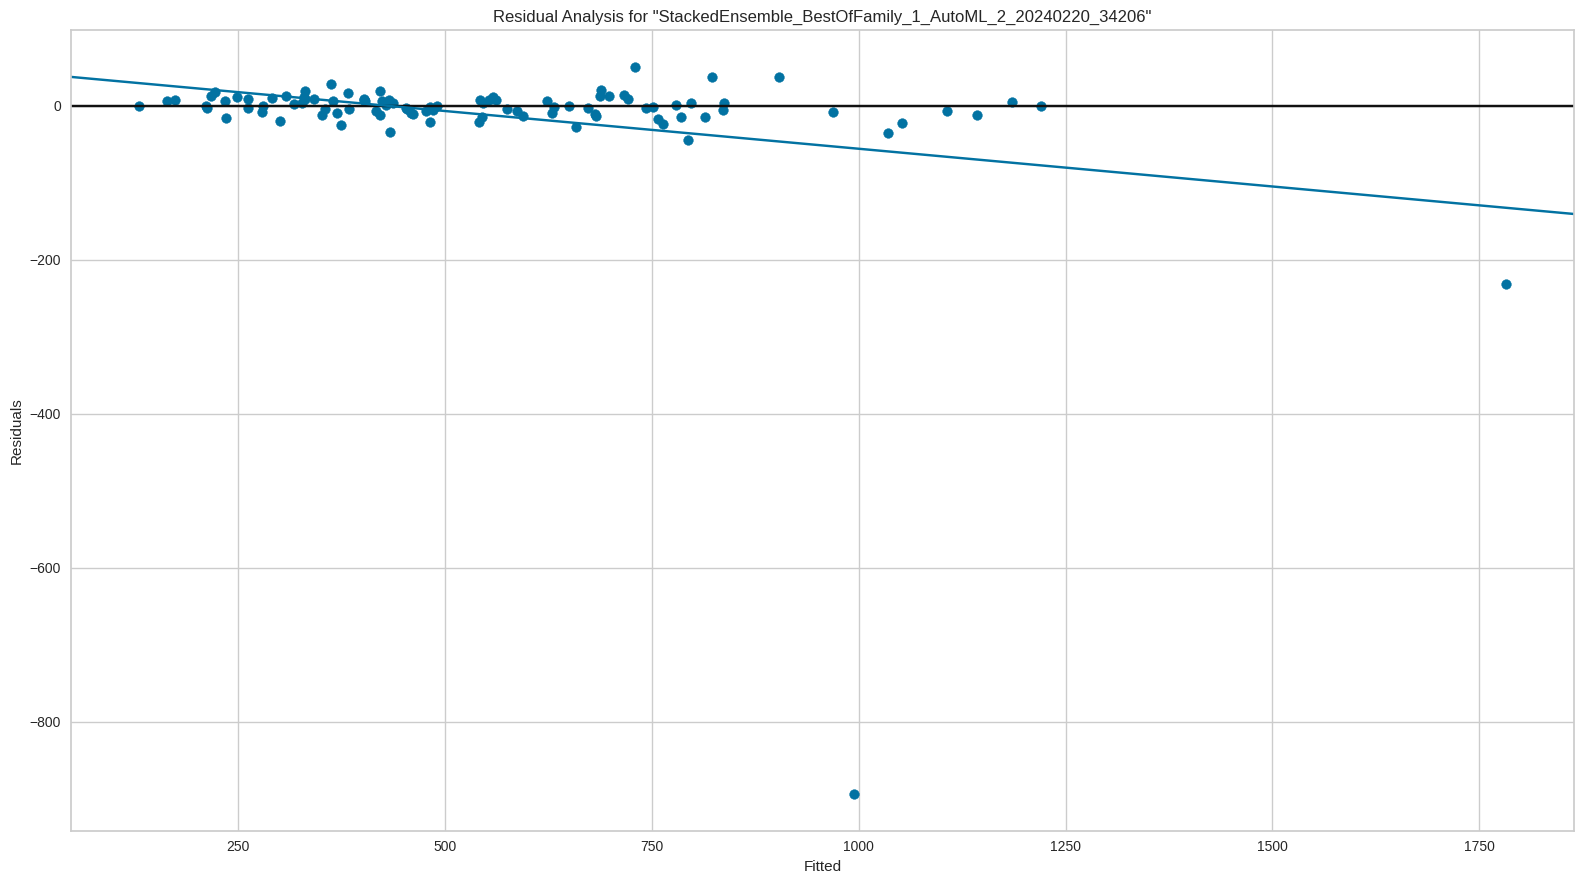

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

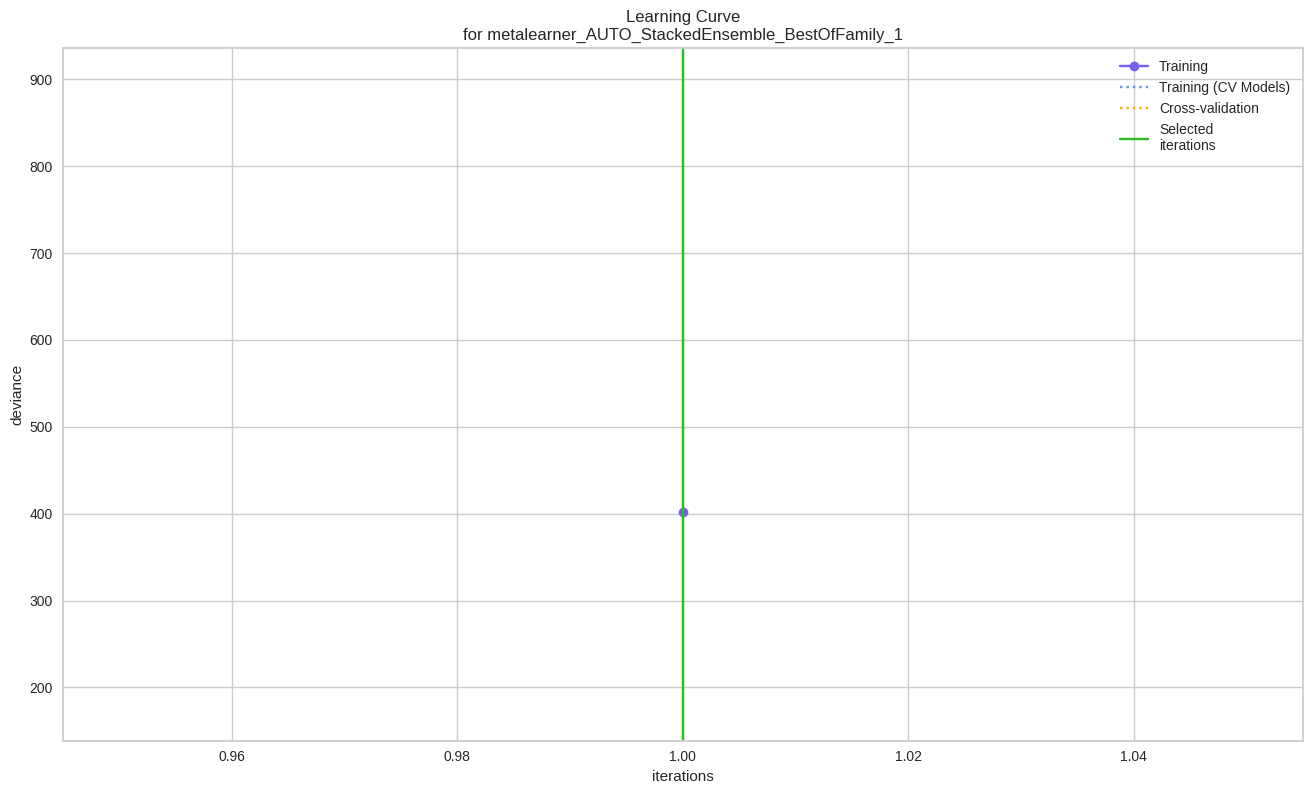

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

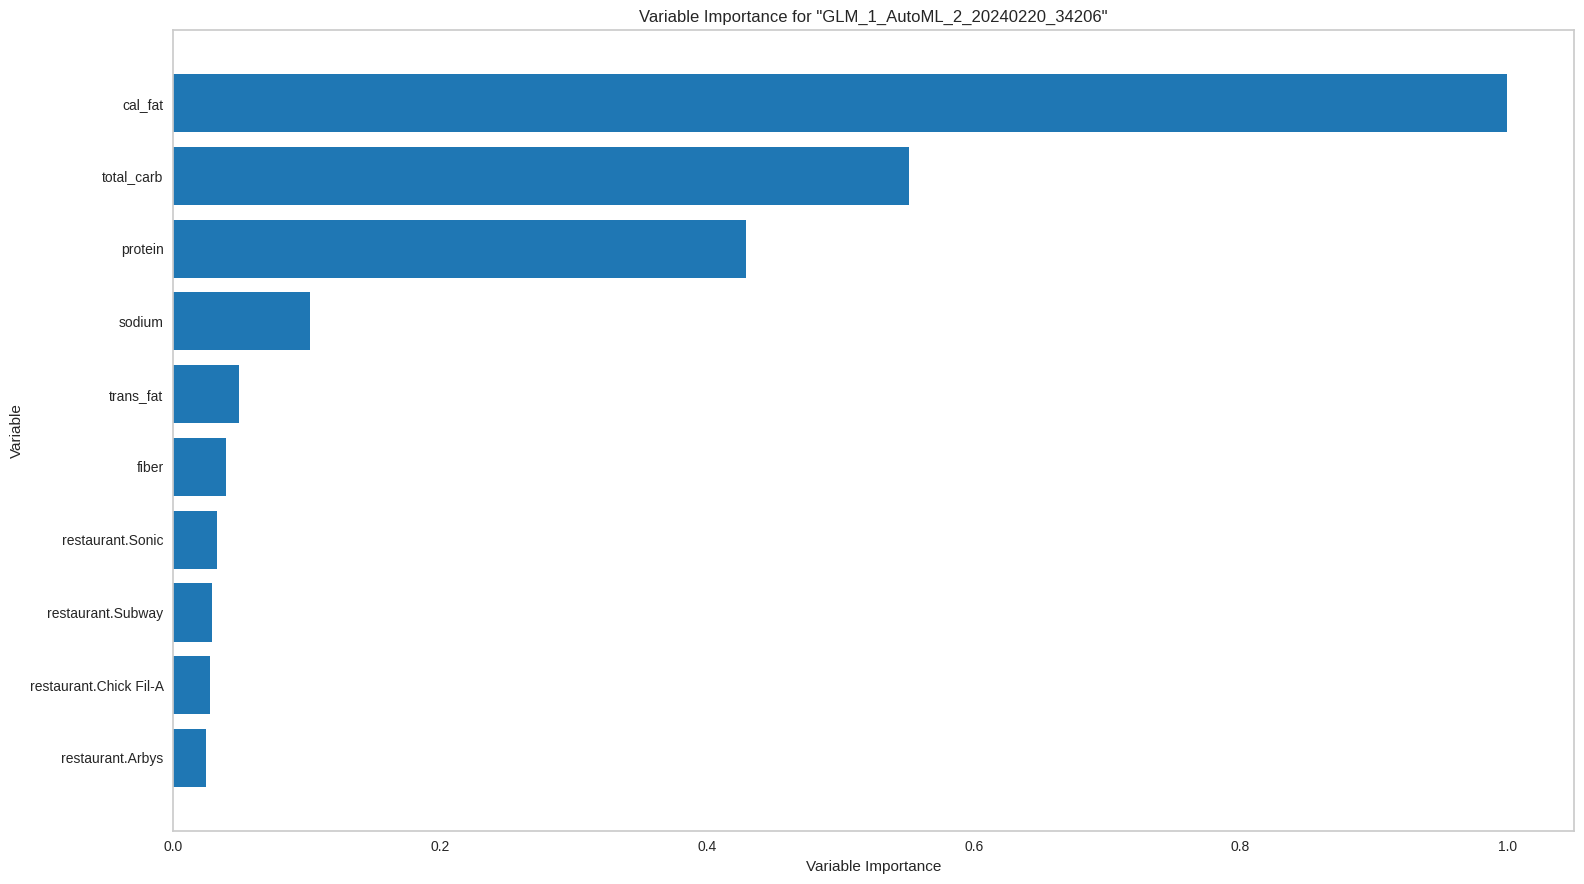

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

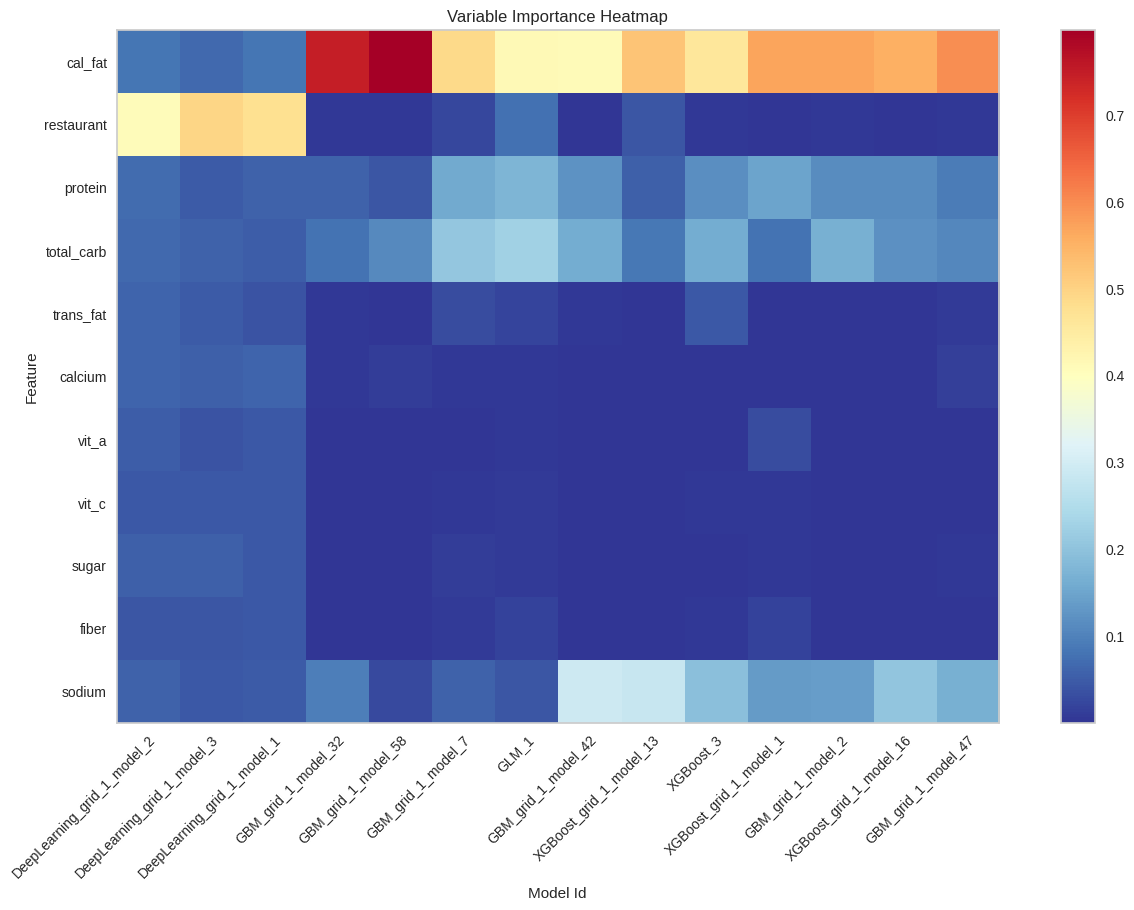

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

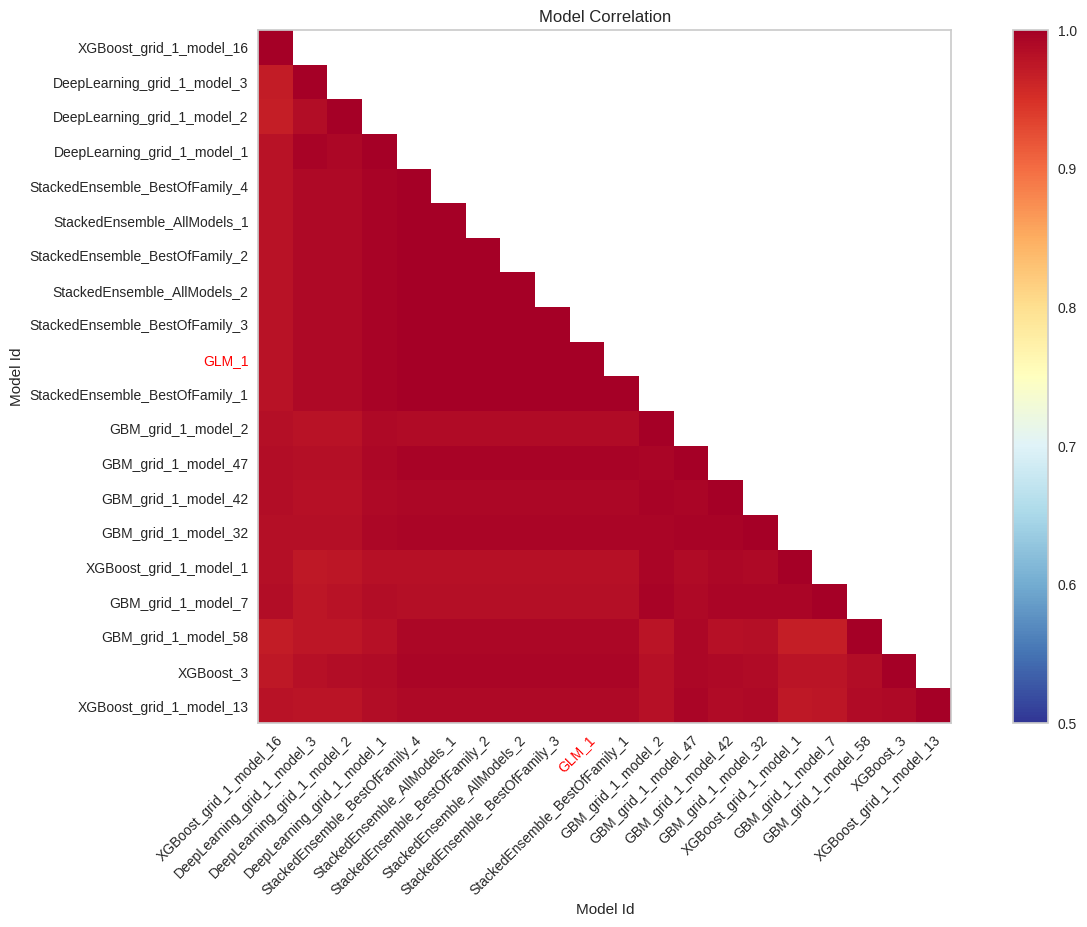

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

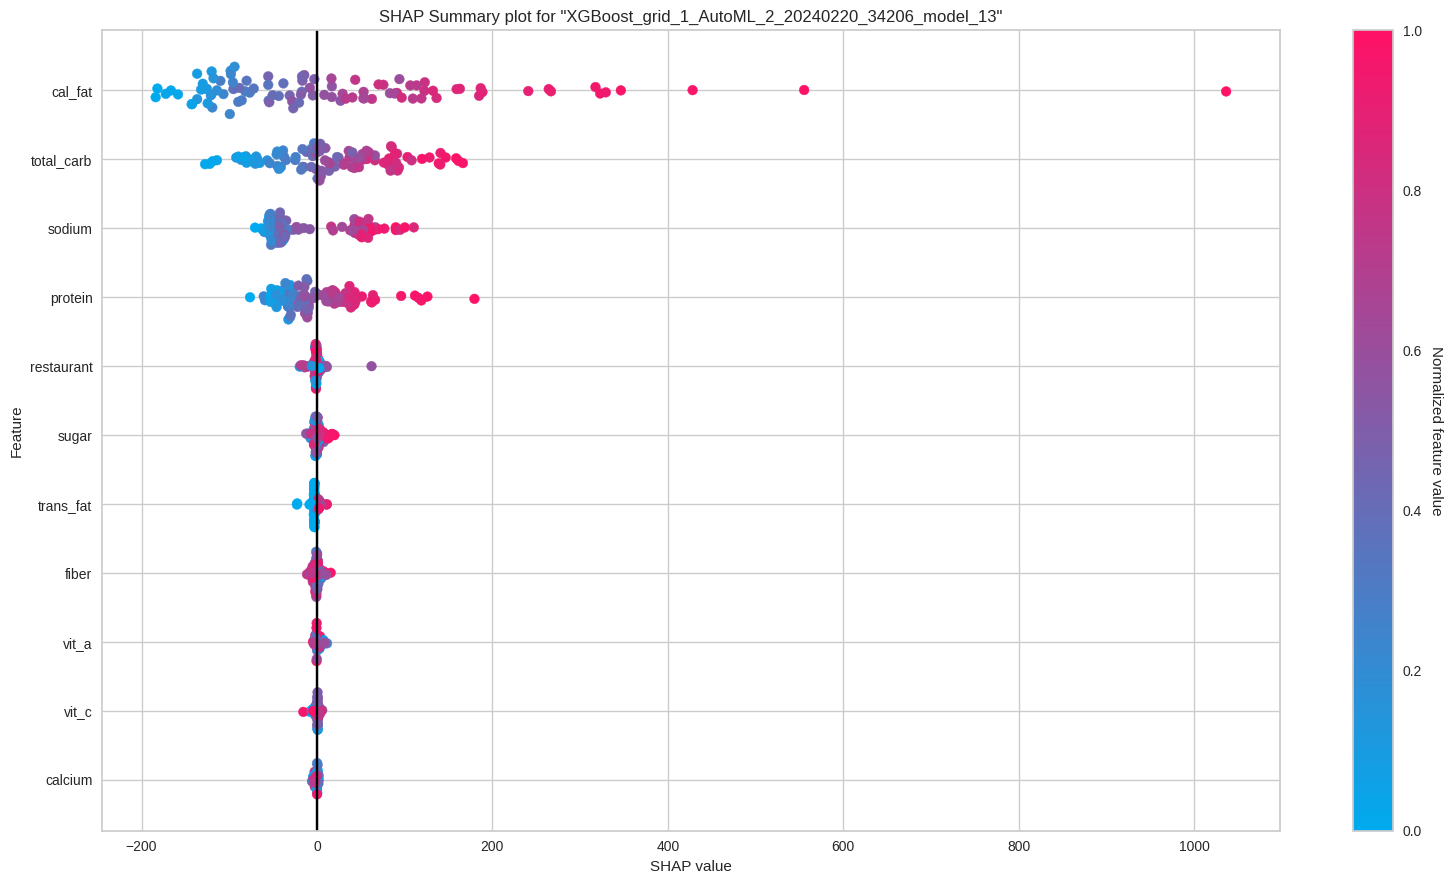

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

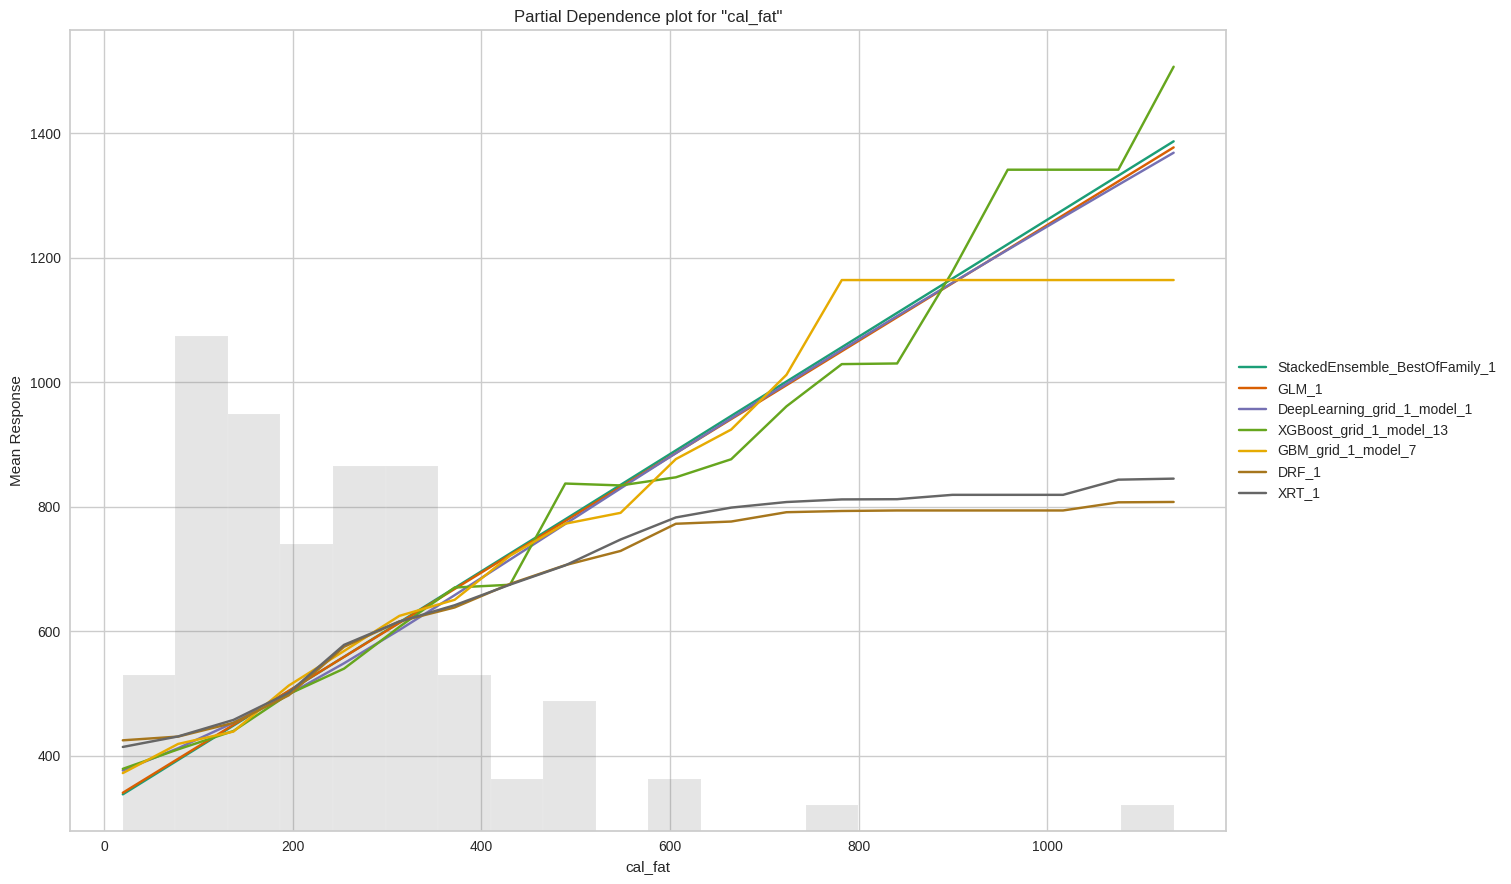

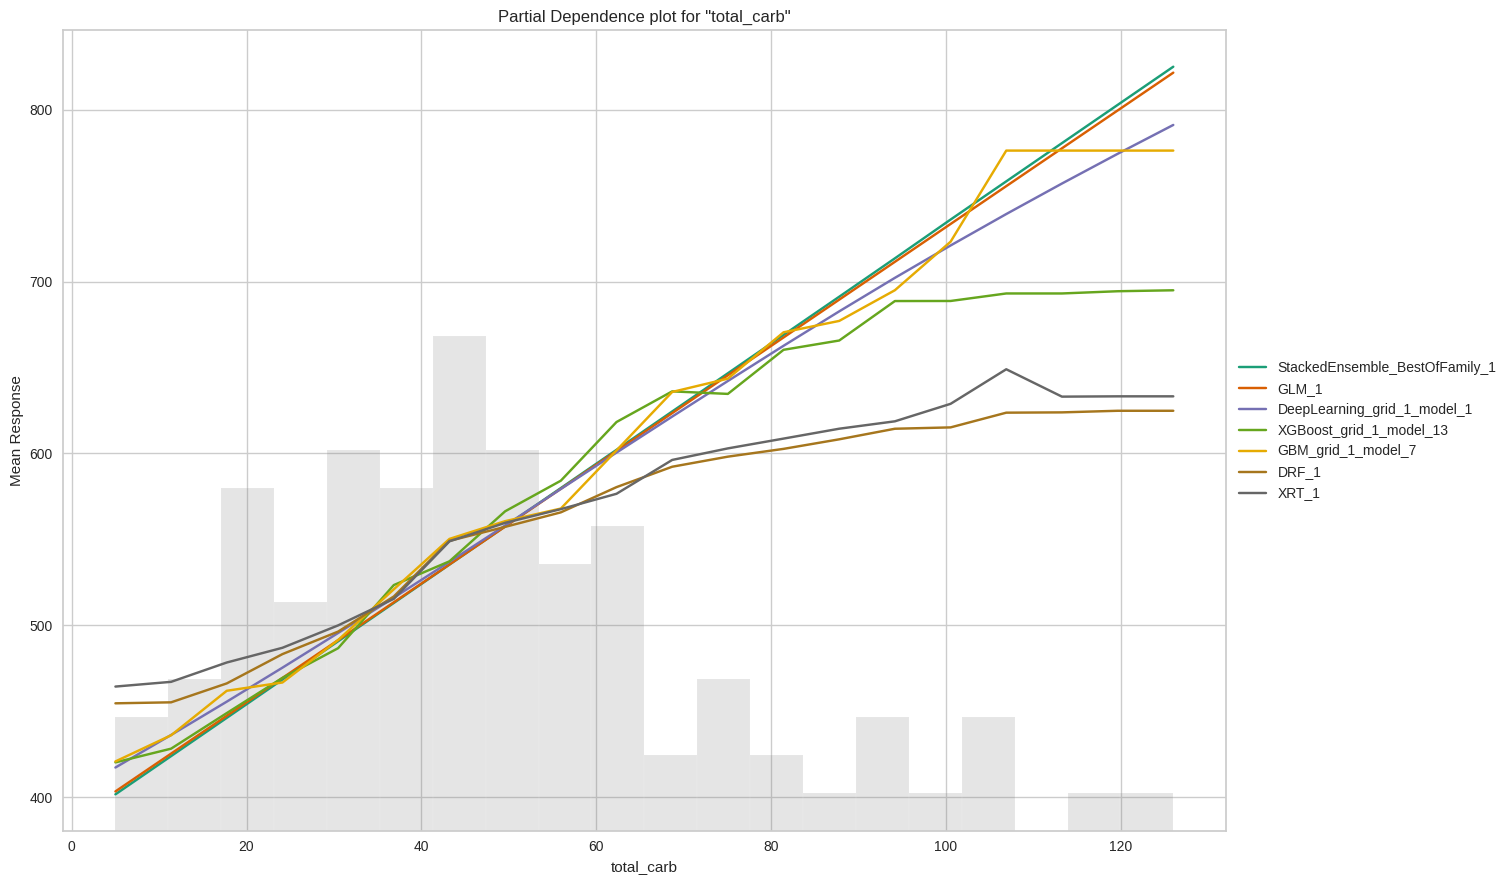

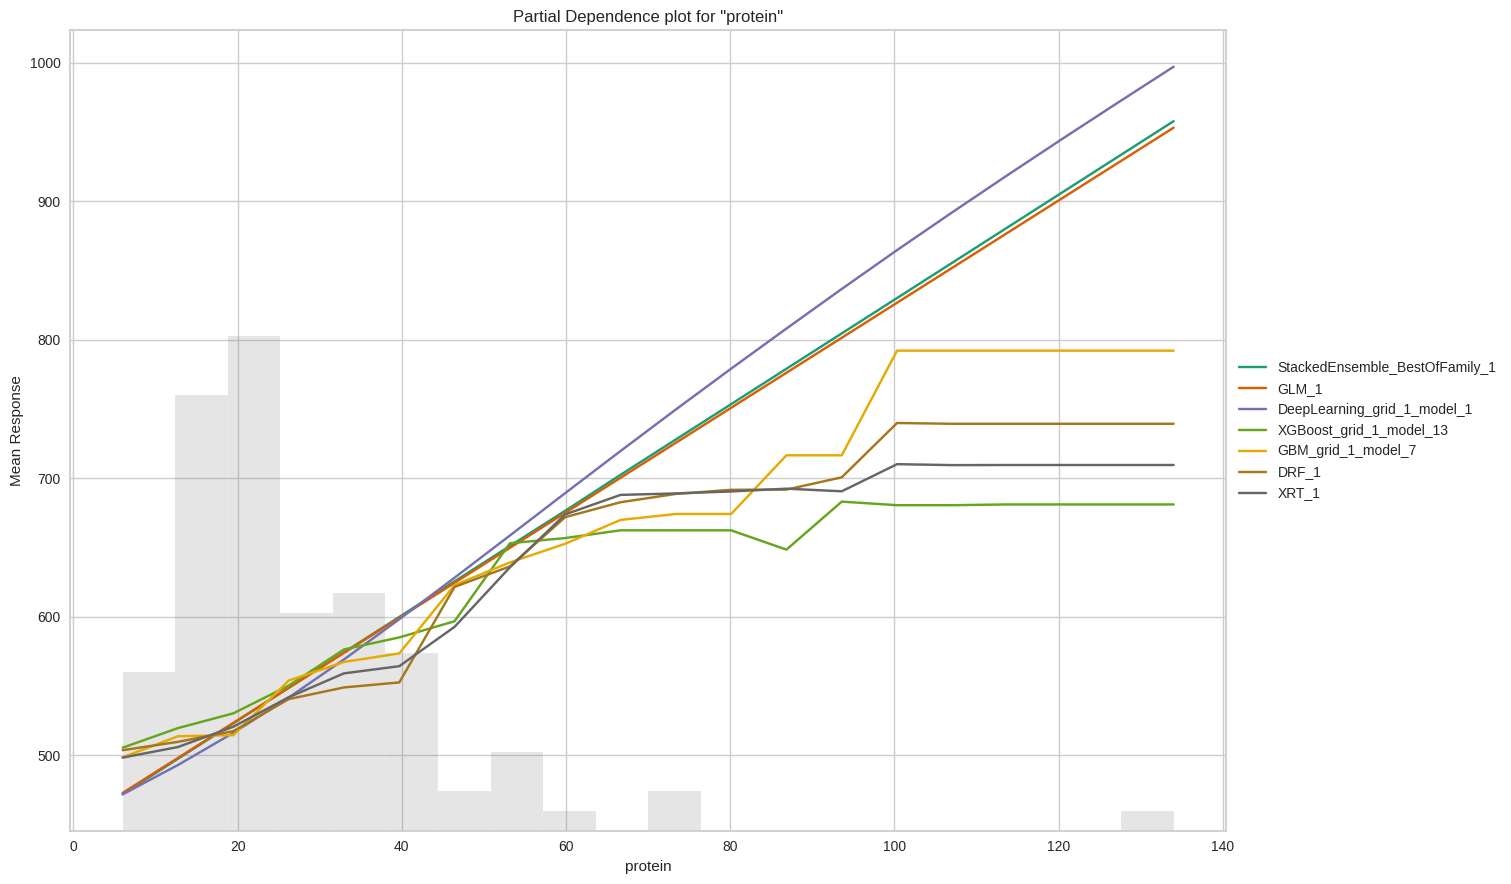

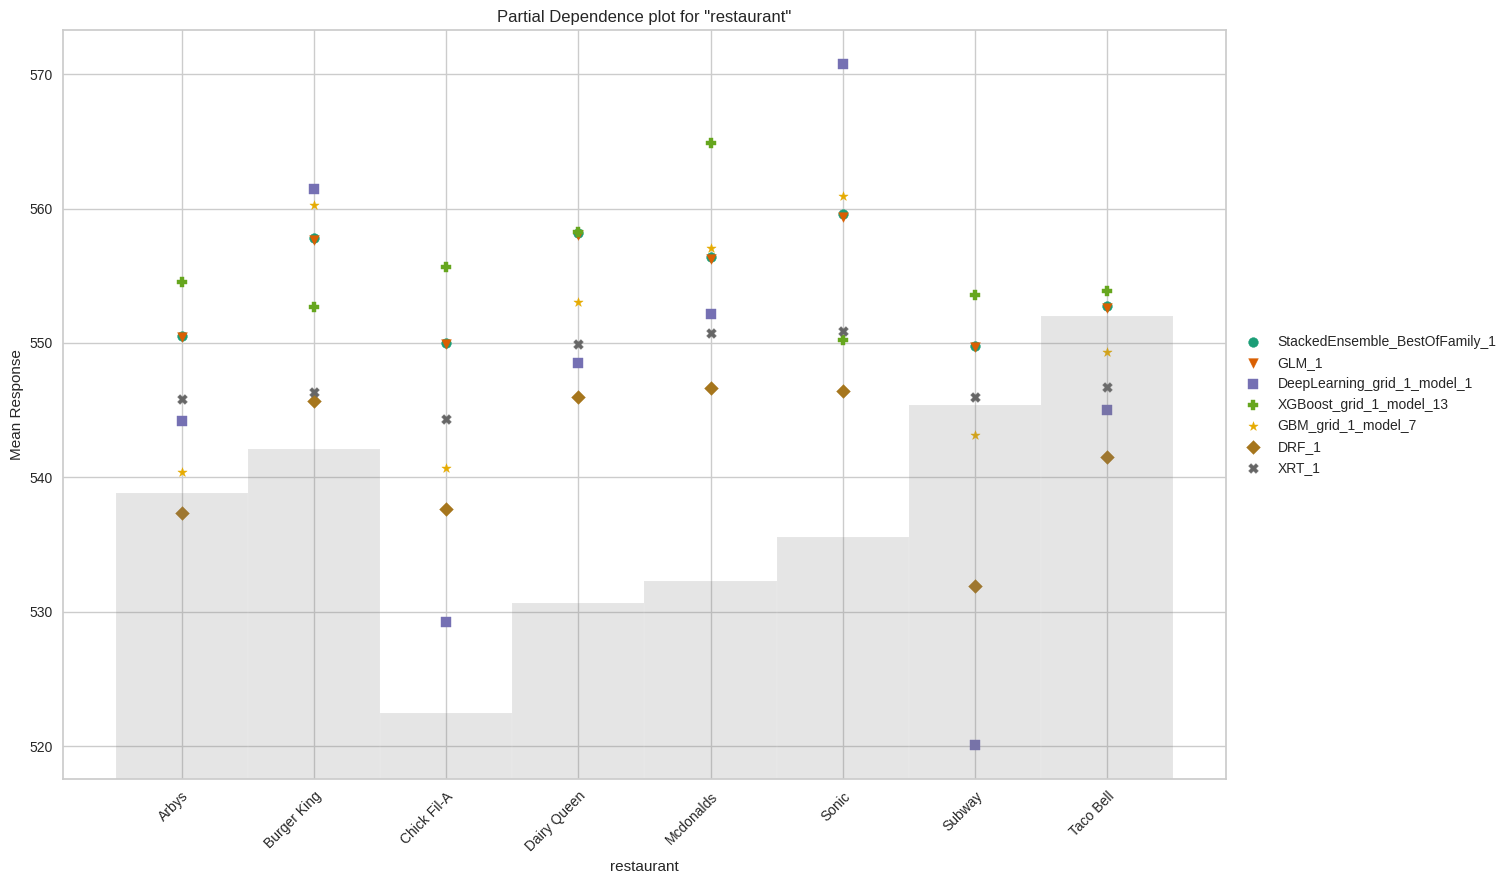

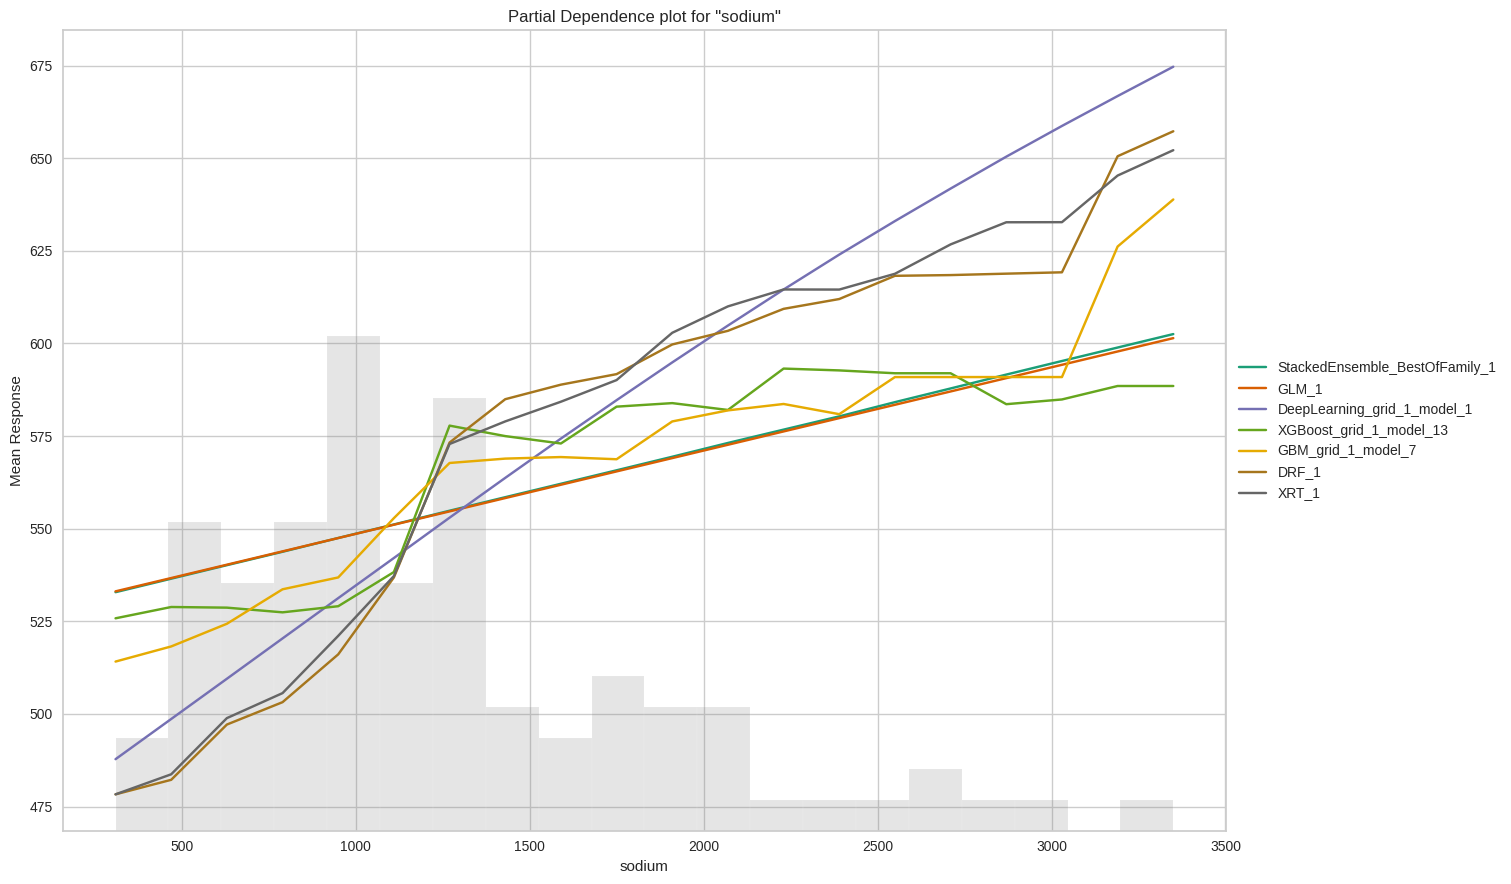

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

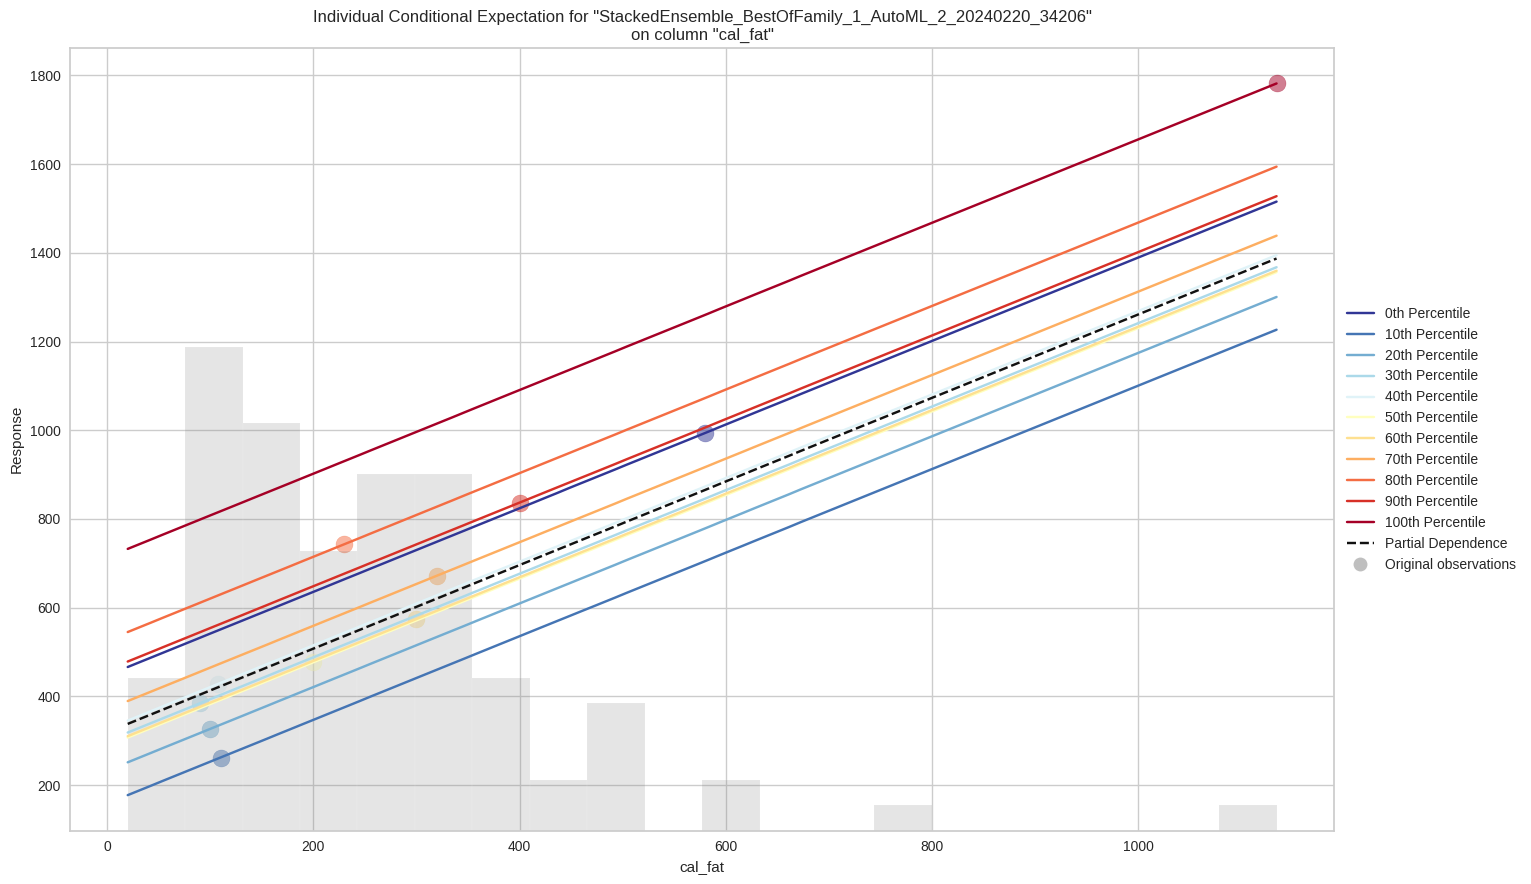

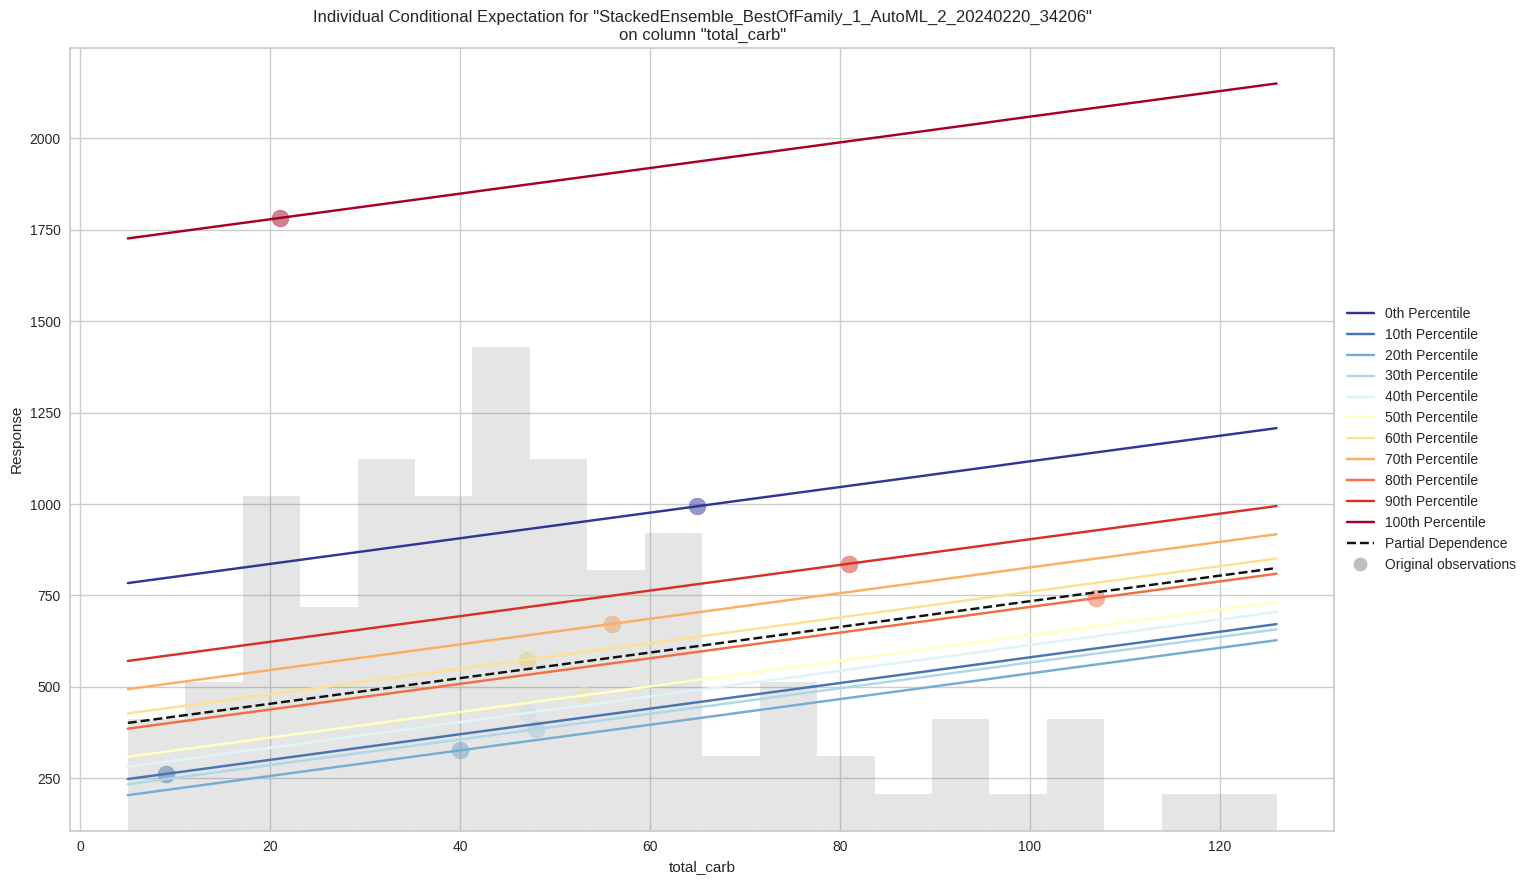

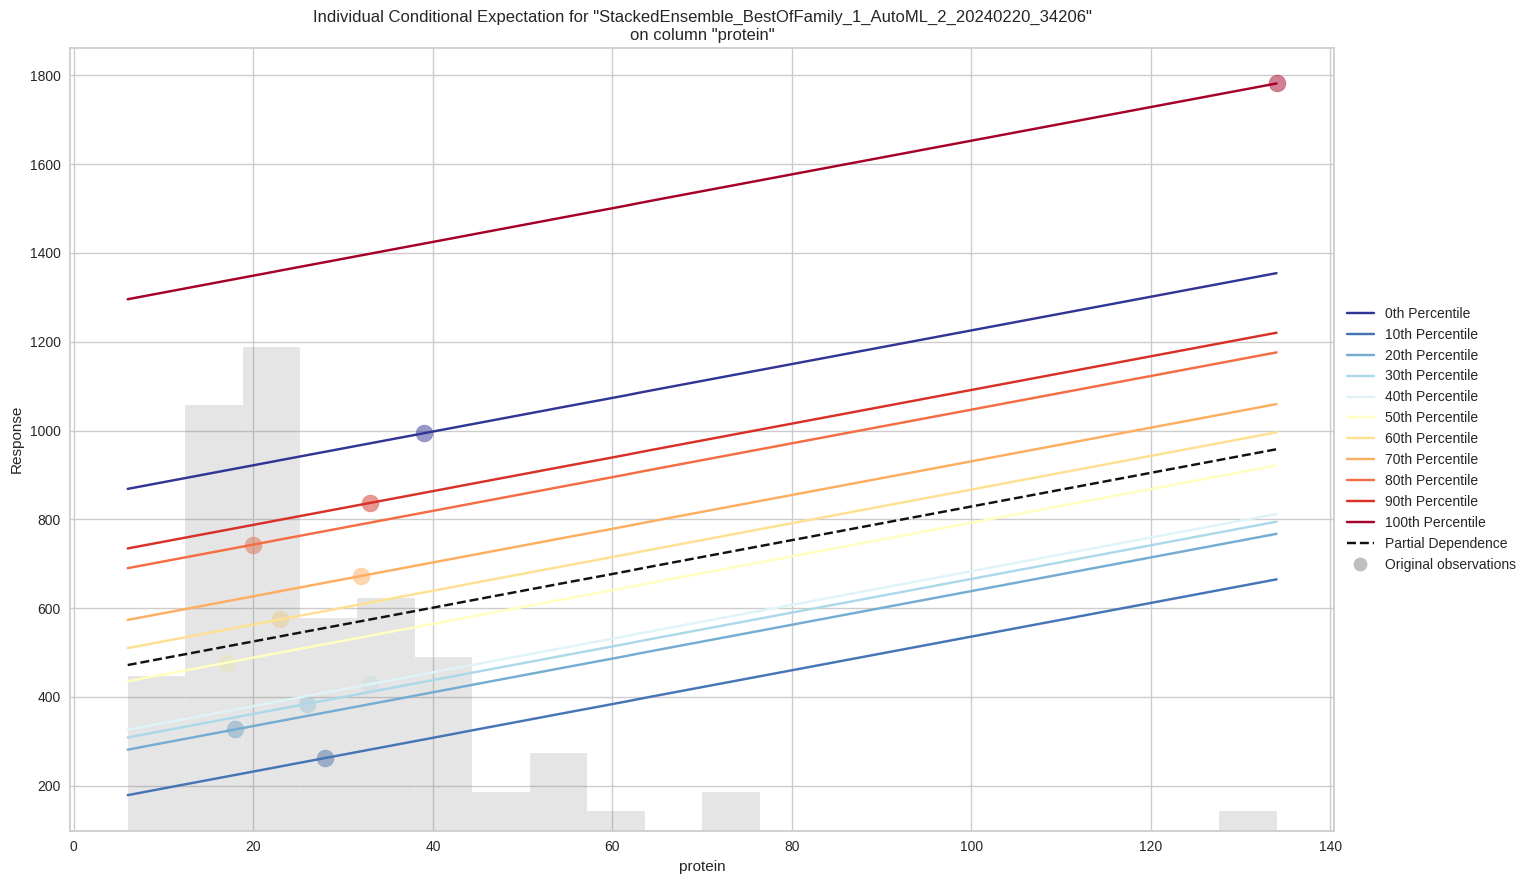

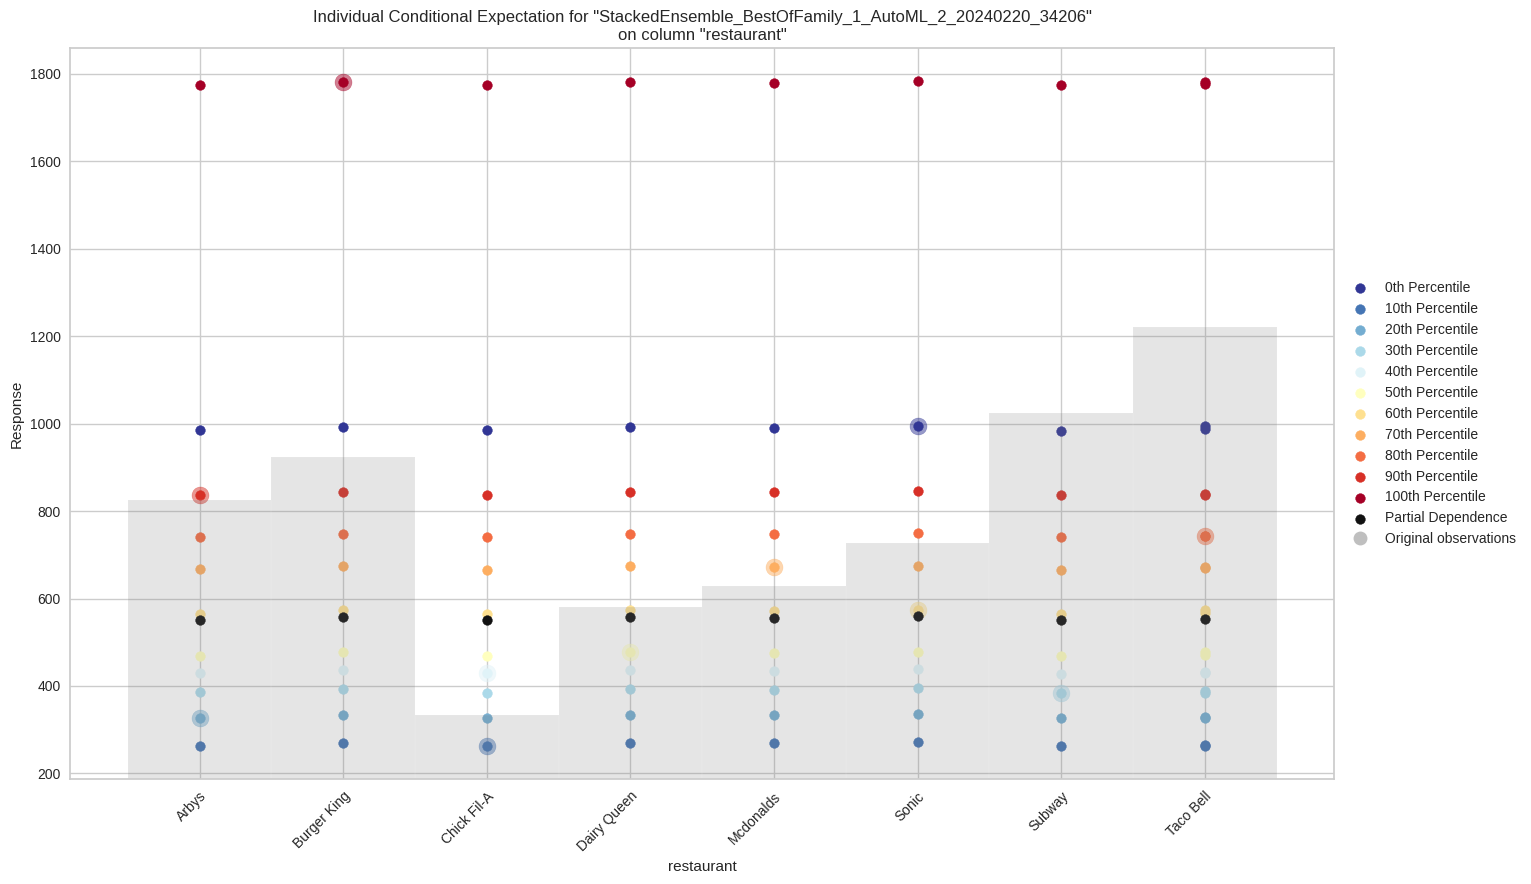

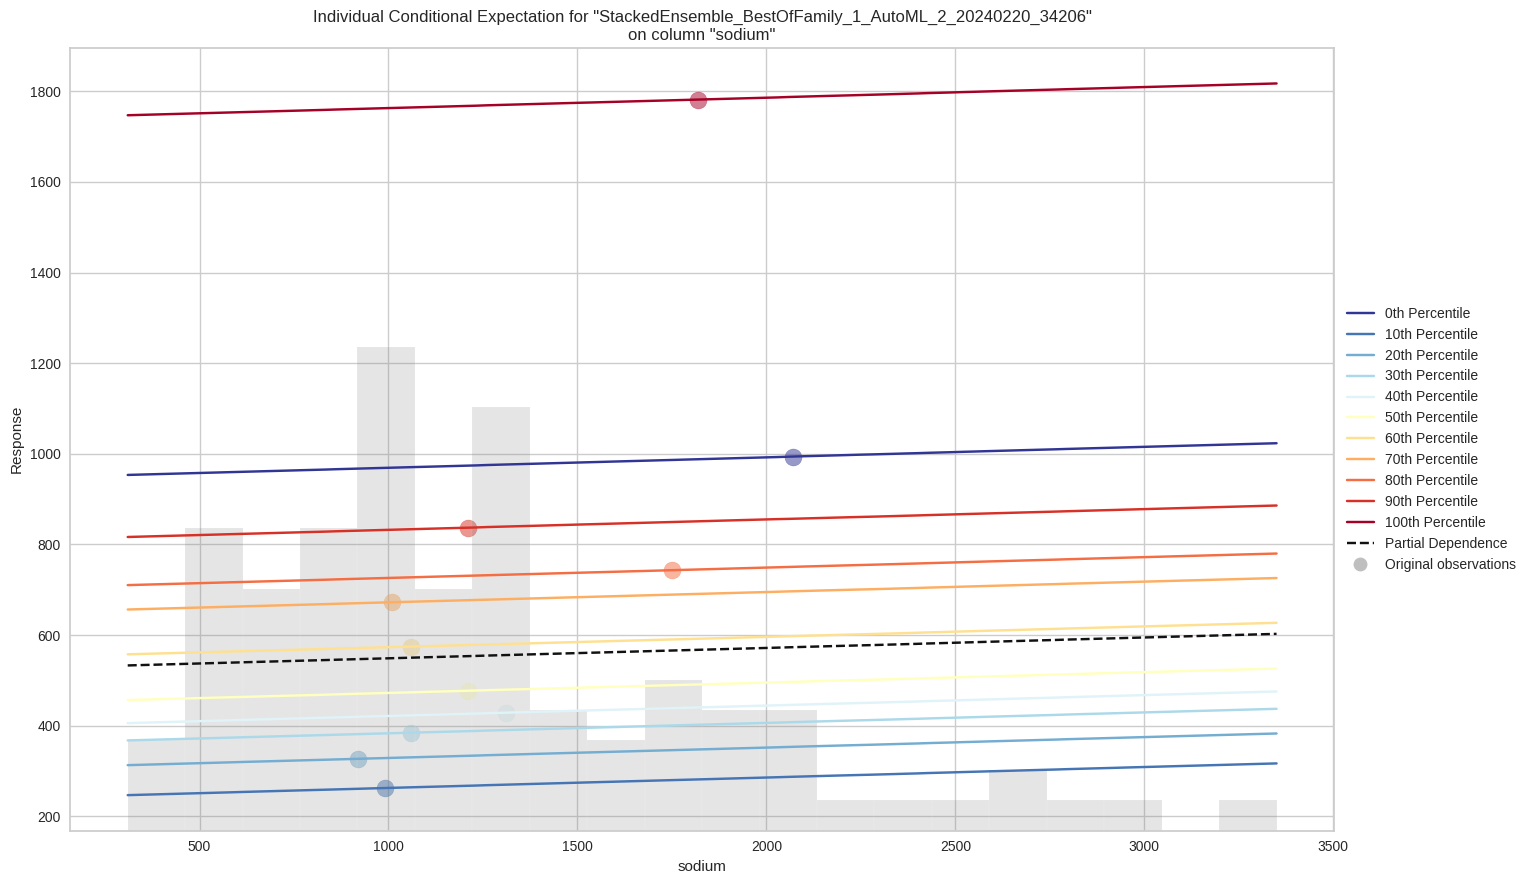

In [84]:
exa = aml1.explain(df1_test)

# Hyperparameter Tuning


In [85]:
# Assuming dfpd1 is your DataFrame
int_columns = dfpd1.select_dtypes(include=['int']).columns
df_int = dfpd1[int_columns]

In [86]:
s = df_int['calories']

t = df_int.drop(['calories'], axis = 1)

In [87]:
print(df_int)

     calories  cal_fat  sodium  total_carb  sugar
0         380       60    1110          44     11
1         840      410    1580          62     18
2        1130      600    1920          63     18
3         750      280    1940          62     18
4         920      410    1980          81     18
..        ...      ...     ...         ...    ...
510       780      340    1850          87      8
511       580      260    1270          59      7
512       780      380    1340          74      7
513       720      320    1260          70      8
514       720      320    1340          70      8

[515 rows x 5 columns]


In [88]:
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import RandomizedSearchCV

In [89]:
t_train, t_test, s_train, s_test = train_test_split (t, s, random_state = 101, test_size = 0.2)

In [90]:
from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import RandomForestRegressor

mode = RandomForestRegressor()

param_vals = {'max_depth': [200, 500, 800, 1100], 'n_estimators': [100,200, 300, 400], 'min_samples_split' : [2,3,5]

}

random_rf = RandomizedSearchCV(estimator=mode, param_distributions=param_vals,

n_iter=10, scoring='accuracy', cv=5,

refit=True, n_jobs=-1)

#Training and prediction



random_rf.fit(t_train, s_train)

preds = random_rf.best_estimator_.predict(t_test)

In [95]:
random_rf.best_params_

{'n_estimators': 300, 'min_samples_split': 2, 'max_depth': 500}

# Conclusion


Based on the analysis, the model demonstrates strong predictive power for calorie content based on the selected features. The variables "cal_fat," "total_carb," and "protein" appear to be the most significant predictors of calorie content. Multicollinearity is present in some variables, such as "sodium" and "total_carb," which have high VIF values. Regularization has helped improve the model's performance.

# Assignment Question/Answers

**Q1. Is the relationship significant?**

Answer: The significance of each predictor variable can be determined by examining the p-values associated with their coefficients. The p-values for each predictor variable are as follows:


cal_fat: p-value < 0.05 (significant)

trans_fat: p-value > 0.05 (not significant)

sodium: p-value > 0.05 (not significant)

total_carb: p-value < 0.05 (significant)

fiber: p-value > 0.05 (not significant)

sugar: p-value > 0.05 (not significant)

protein: p-value < 0.05 (significant)

vit_a: p-value > 0.05 (not significant)

vit_c: p-value > 0.05 (not significant)

calcium: p-value > 0.05 (not significant)

Based on the p-values, the variables cal_fat, total_carb, and protein are statistically significant predictors of the calories in fast food items, while the other variables are not statistically significant. This means that cal_fat, total_carb, and protein have a significant relationship with the calorie content, while the other variables do not have enough evidence to suggest a significant relationship.







**Q2.Are any model assumptions violated?**
Answer:

To check the assumptions of linear regression. Here are the results:

Linear Relationship: The model assumes a linear relationship between the independent variables and the dependent variable. You can assess this assumption by checking the residuals versus fitted values plot. If the points are randomly scattered around the horizontal axis, it suggests a linear relationship.

Homoscedasticity: This assumption implies that the variance of the errors should be constant across all levels of the independent variables. You can check this assumption by plotting the residuals against the predicted values. If the spread of points is uniform across the plot, homoscedasticity is assumed.

Multicollinearity: Multicollinearity occurs when independent variables are highly correlated. My model's summary indicates the presence of strong multicollinearity, which may affect the coefficient estimates and their interpretation.

Autocorrelation: This assumption assumes that the errors are independent of each other. Durbin-Watson test helps in detecting autocorrelation, where values between 1.5 and 2.5 indicate no autocorrelation. My model's Durbin-Watson value is around 2, suggesting no significant autocorrelation.

Normality of Residuals: The residuals should be normally distributed. You can check this visually using a histogram or a Q-Q plot. My histogram and Q-Q plot of residuals suggest that they are approximately normally distributed.

Based on these assessments, my model seems to satisfy most assumptions, except for possibly the presence of multicollinearity. You may want to further investigate multicollinearity and consider other diagnostic tests for model validation.

**Q3. Is there any multicollinearity in the model?**


Based on the VIF values, there is some multicollinearity in the model:

Variables "total_carb" and "sodium" have VIF values indicating high multicollinearity (VIF > 10).
Variables "cal_fat", "fiber", "protein" also have moderate multicollinearity (VIF between 5 and 10).

**Q4. In the multivariate models are predictor variables independent of all the other predictor variables?**

Answer: Based on the VIF values provided earlier, it seems that some predictor variables in the model are highly correlated with each other, indicating potential multicollinearity issues.






**Q5. In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.**

Answer: the most significant predictor variables can be ranked based on their p-values. Variables with p-values less than 0.05 are typically considered significant. Here's a list of variables ranked by significance:

cal_fat (p-value: <0.001)

total_carb (p-value: <0.001)

protein (p-value: <0.001)

sugar (p-value: 0.819)

sodium (p-value: 0.189)

trans_fat (p-value: 0.185)

vit_c (p-value: 0.907)

calcium (p-value: 0.799)

fiber (p-value: 0.945)

vit_a (p-value: 0.687)

Based on this ranking, sugar, sodium, trans_fat, vit_c, calcium, fiber, and vit_a are relatively less significant as their p-values are greater than 0.05.

**Q6. Does the model make sense?**


The model uses linear regression and includes several independent variables such as calories from fat, total carbohydrates, protein, sugar, sodium, trans fat, fiber, vitamins A and C, and calcium.

To assess whether the model makes sense, consider the following:

Relevance of Variables: The selected independent variables (nutritional components) are relevant to determining the calorie content of fast food items, which makes sense from a nutritional standpoint.

Model Fit: The model has an R-squared value of 0.970, indicating that it explains 97% of the variance in the dependent variable (calories). This high R-squared value suggests that the model fits the data well and can effectively predict calorie content based on the chosen variables.

Significance of Variables: Most of the variables (cal_fat, total_carb, protein) have significant coefficients (p < 0.05), indicating that they are important predictors of calorie content.

Assumptions: The model assumptions (linearity, homoscedasticity, normality of residuals, absence of multicollinearity) should be checked, which you have done using residual plots and VIF calculations.

Overall, based on the provided information, the model appears to make sense and is a reasonable approach for predicting calorie content in fast food items based on nutritional components.

**Q7. Does regularization help?**

Answer. Regularization is used to prevent overfitting by adding a penalty term to the model's loss function. In this case, I've applied Ridge regularization (L2 regularization) to the linear regression model.

To determine if regularization helps, we can compare the performance of the regularized model (with Ridge regularization) to the non-regularized model. We can look at metrics such as RMSE, MSE, and MAE to see if there is an improvement with regularization.

From your model outputs, it appears that the regularized model (StackedEnsemble_BestOfFamily_4_AutoML_4_20240219_193014) has an RMSE of 27.6497, while the non-regularized model (GLM_1_AutoML_4_20240219_193014) has an RMSE of 28.2336. This suggests that regularization (StackedEnsemble) has slightly better performance in terms of RMSE, indicating that it helps improve the model's predictive ability.

In conclusion, regularization seems to help improve the model's performance, as indicated by the lower RMSE in the regularized model compared to the non-regularized model.






Q8. Which independent variables are significant?

Answer. the variables with p-values less than 0.05 are typically considered significant. Here's a summary of the coefficients along with their p-values:

cal_fat: coefficient = 0.9488, p-value < 0.05

trans_fat: coefficient = 5.5811, p-value > 0.05

sodium: coefficient = 0.0095, p-value > 0.05

total_carb: coefficient = 3.9805, p-value < 0.05

fiber: coefficient = -0.0883, p-value > 0.05

sugar: coefficient = 0.1022, p-value > 0.05

protein: coefficient = 3.6660, p-value < 0.05

vit_a: coefficient = -0.0427, p-value > 0.05

vit_c: coefficient = 0.0132, p-value > 0.05

calcium: coefficient = -0.0488, p-value > 0.05

Based on this, the significant variables (with p-values less than 0.05) are cal_fat, total_carb, and protein. These variables are considered to have a significant impact on the dependent variable (calories).

**Q9. Which hyperparameters are important?**



It appears that the most significant predictor variables for predicting calorie content in fast food items are:


cal_fat: This variable has a coefficient of 0.9488 and a very low p-value, indicating a strong positive relationship with calorie content.


total_carb: This variable has a coefficient of 3.9805 and a very low p-value, indicating a strong positive relationship with calorie content.


protein: This variable has a coefficient of 3.6660 and a very low p-value, indicating a strong positive relationship with calorie content.

These three variables seem to be the most significant predictors of calorie content in your model. It would be advisable to exclude insignificant variables like fiber, sugar, vit_a, vit_c, and calcium from the model, as they have high p-values and do not seem to have a significant impact on calorie content.

# MIT License

MIT License

Copyright (c) 2024 SaiPranaviJeedigunta

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

# References and Citations

1. CC_Kaggle_AutoML_Regression_Melbourne_Housing.ipynb -
 https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/CC_Kaggle_AutoML_Regression_Melbourne_Housing.ipynb

2. H20.ai- https://docs.h2o.ai/

3. OLS Model- http://net-informations.com/ds/mla/ols.html